# Introdução

## Importação de Bibliotecas Necessárias

In [126]:
import warnings
import pandas as pd
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm, probplot, pearsonr, power_divergence
warnings.filterwarnings("ignore")

## Declaração da Função do Método de Sturges 

In [127]:
def sturges(dados_coluna):
    return int(1 + 3.3 * np.log10(len(dados_coluna)))

In [128]:
def _intervalo_de_bins(dados_coluna) -> List[float]:
    intervalo_do_bin = []
    tamanho_do_bin = sturges(dados_coluna)
    valor_minimo = dados_coluna.min()
    valor_maximo = dados_coluna.max()
    intervalo_do_bin.append(valor_minimo)
    for i in range(1, tamanho_do_bin):
        intervalo_do_bin.append(valor_minimo + (valor_maximo - valor_minimo) / tamanho_do_bin * i)
    intervalo_do_bin.append(valor_maximo)
    return intervalo_do_bin

In [129]:
def segmentar_bins(df1, df2, coluna) -> Tuple[pd.DataFrame, pd.DataFrame]:
    bins = _intervalo_de_bins(df1[coluna] if len(df1) < len(df2) else df2[coluna])

    nome_da_coluna = coluna + "_bins"
    legenda_dos_bins = [str(bins[i]) + " - " + str(bins[i + 1]) for i in range(len(bins) - 1)]

    df1[nome_da_coluna] = pd.cut(df1[coluna], bins, labels=legenda_dos_bins, include_lowest=True)
    df2[nome_da_coluna] = pd.cut(df2[coluna], bins, labels=legenda_dos_bins, include_lowest=True)

    return df1, df2

## Carregamento das Bases de Dados

In [130]:
dados_chromecast = pd.read_csv('dataset_chromecast.csv')
dados_smartTv = pd.read_csv('dataset_smart-tv.csv')

## Familiarizando-se com as Tabelas

### Chromecast

In [131]:
dados_chromecast.head(5)

,device_id,date_hour,bytes_up,bytes_down
0,66161985,2021-09-06 00:01:00,2987.016393,49185.704918
1,66161985,2021-09-06 00:02:00,685.935484,328.258065
2,66161985,2021-09-06 00:03:00,4493.901639,37914.064516
3,66161985,2021-09-06 00:04:00,776.133333,229.200000
4,66161985,2021-09-06 00:05:00,3081.311475,51656.800000


### SmartTV

In [132]:
dados_smartTv.head(5)

,device_id,date_hour,bytes_up,bytes_down
0,77209603,2021-11-22 15:23:00,132932.983607,2.818140e+06
1,77209603,2021-11-22 15:24:00,115770.491803,2.264410e+06
2,77209603,2021-11-22 15:25:00,114030.032787,2.309270e+06
3,77209603,2021-11-22 15:26:00,97170.622951,2.006544e+06
4,77209603,2021-11-22 15:27:00,39569.573770,8.061440e+05


## Tratamento de Dados

### Reescalonamento de Dados para Log 10

#### Chromecast

In [133]:
dados_chromecast["log_bytes_down"] = np.log10(1 + dados_chromecast["bytes_down"])
dados_chromecast["log_bytes_up"] = np.log10(1 + dados_chromecast["bytes_up"])

#### SmartTV

In [134]:
dados_smartTv["log_bytes_down"] = np.log10(1 + dados_smartTv["bytes_down"])
dados_smartTv["log_bytes_up"] = np.log10(1 + dados_smartTv["bytes_up"])

### Criando uma Nova Coluna chamada Hour

#### Chromecast

In [135]:
dados_chromecast["hour"] = dados_chromecast["date_hour"].apply(
    lambda x: int(x.split(" ")[1].split(":")[0])
)

#### SmartTV

In [136]:
dados_smartTv["hour"] = dados_smartTv["date_hour"].apply(
    lambda x: int(x.split(" ")[1].split(":")[0])
)

# Estatísticas Gerais

## Histogramas

### Histograma Frequência x Log₁₀(Bytes Up)

#### Chromecast

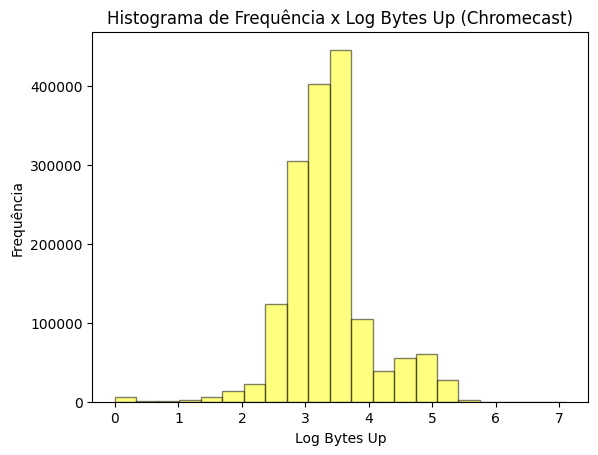

In [137]:
chromecast_hist_bin = sturges(dados_chromecast["log_bytes_up"])
fig = plt.figure()
plt.hist(
    dados_chromecast["log_bytes_up"],
    bins=chromecast_hist_bin,
    color="yellow",
    alpha=0.5,
    edgecolor="black",
)
plt.xlabel("Log Bytes Up")
plt.ylabel("Frequência")
plt.title("Histograma de Frequência x Log Bytes Up (Chromecast)")
fig.savefig(
    "Gráficos\secao2\Histograma\Chromecast\chromecast_hist_log_bytes_up.png", 
    dpi=fig.dpi
)
plt.show()

#### SmartTV

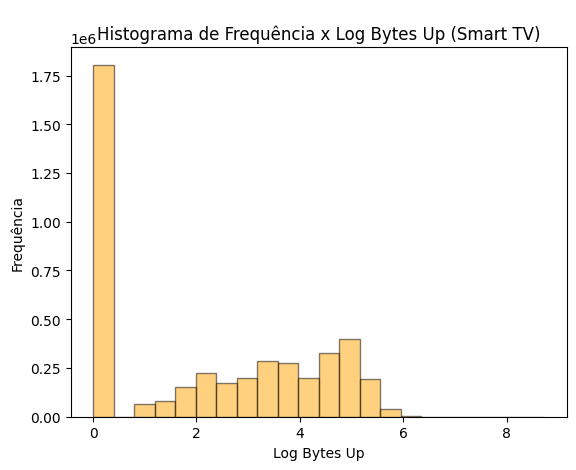

In [138]:
smart_tv_hist_bin = sturges(dados_smartTv["log_bytes_up"])
fig = plt.figure()
plt.hist(
    dados_smartTv["log_bytes_up"],
    bins=smart_tv_hist_bin,
    color="orange",
    alpha=0.5,
    edgecolor="black",
)
plt.xlabel("Log Bytes Up")
plt.ylabel("Frequência")
plt.title("Histograma de Frequência x Log Bytes Up (Smart TV)")
fig.savefig(
    "Gráficos\secao2\Histograma\SmartTV\smart_tv_hist_log_bytes_up.png", 
    dpi=fig.dpi
)
plt.show()

### Histograma Frequência x Log₁₀(Bytes down)

#### Chromecast

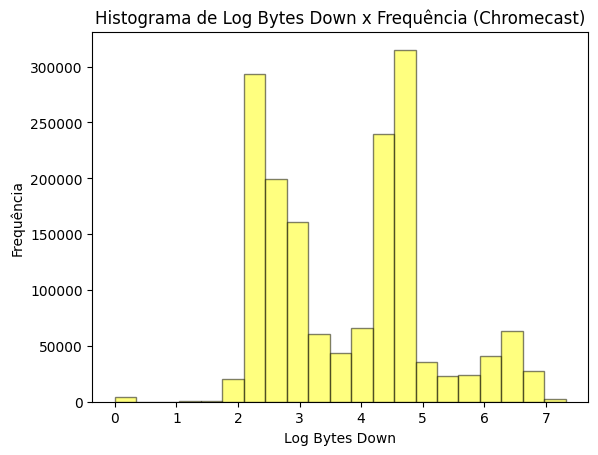

In [139]:
chromecast_hist_bin = sturges(dados_chromecast["log_bytes_down"])
fig = plt.figure()
plt.hist(
    dados_chromecast["log_bytes_down"],
    bins=chromecast_hist_bin,
    color="yellow",
    alpha=0.5,
    edgecolor="black",
)
plt.xlabel("Log Bytes Down")
plt.ylabel("Frequência")
plt.title("Histograma de Log Bytes Down x Frequência (Chromecast)")
fig.savefig(
    "Gráficos\secao2\Histograma\Chromecast\chromecast_hist_log_bytes_down.png", 
    dpi=fig.dpi
)
plt.show()

#### SmartTV

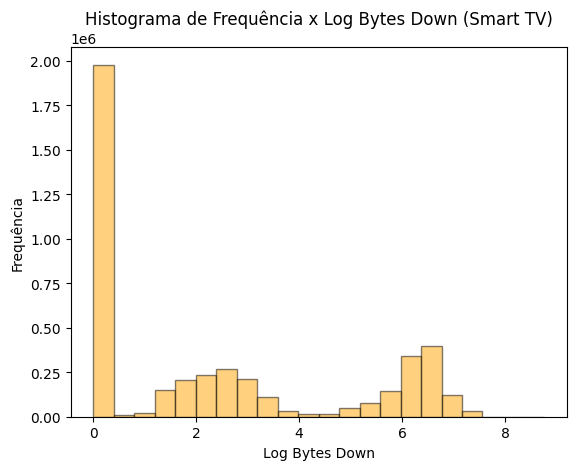

In [140]:
smart_tv_hist_bin = sturges(dados_smartTv["log_bytes_down"])
fig = plt.figure()
plt.hist(
    dados_smartTv["log_bytes_down"],
    bins=smart_tv_hist_bin,
    color="orange",
    alpha=0.5,
    edgecolor="black",
)
plt.xlabel("Log Bytes Down")
plt.ylabel("Frequência")
plt.title("Histograma de Frequência x Log Bytes Down (Smart TV)")
fig.savefig(
    "Gráficos\secao2\Histograma\SmartTV\smart_tv_hist_log_bytes_down.png", 
    dpi=fig.dpi
)
plt.show()

## Distribuição Empírica

### Log₁₀(Bytes Up)

#### Chromecast

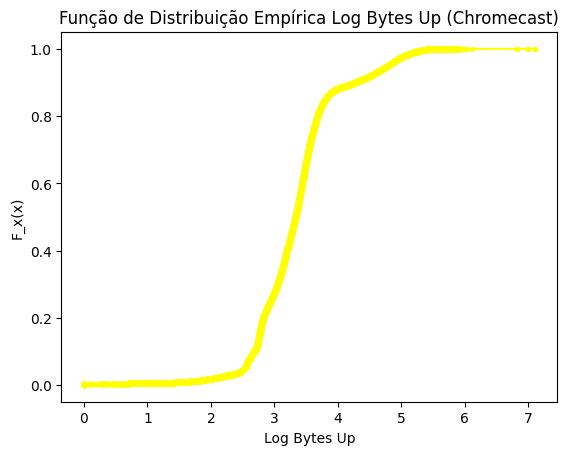

In [141]:
fig = plt.figure()
plt.plot(
    dados_chromecast["log_bytes_up"].sort_values(),
    np.linspace(0, 1, len(dados_chromecast["log_bytes_up"])),
    color="yellow",
    marker=".",
)
plt.xlabel("Log Bytes Up")
plt.ylabel("F_x(x)")
plt.title("Função de Distribuição Empírica Log Bytes Up (Chromecast)")
fig.savefig(
    "Gráficos\secao2\Distribuicao Empirica\Chromecast\chromecast_fde_log_bytes_up.png", 
    dpi=fig.dpi
)
plt.show()

#### SmartTV

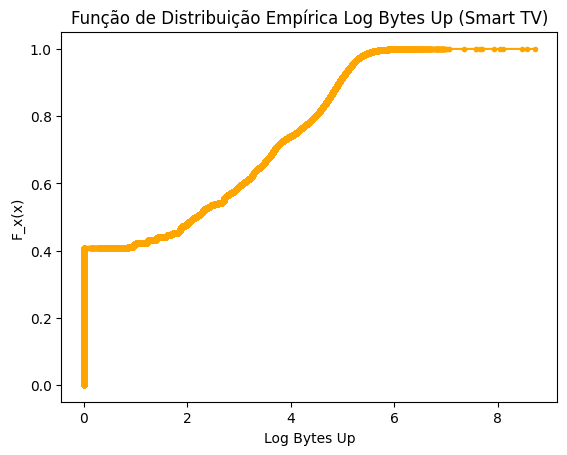

In [142]:
fig = plt.figure()
plt.plot(
    dados_smartTv["log_bytes_up"].sort_values(),
    np.linspace(0, 1, len(dados_smartTv["log_bytes_up"])),
    color="orange",
    marker=".",
)
plt.xlabel("Log Bytes Up")
plt.ylabel("F_x(x)")
plt.title("Função de Distribuição Empírica Log Bytes Up (Smart TV)")
fig.savefig(
    "Gráficos\secao2\Distribuicao Empirica\SmartTV\smart-tv_fde_log_bytes_up.png", 
    dpi=fig.dpi
)
plt.show()

### Log₁₀(Bytes Down)

#### Chromecast

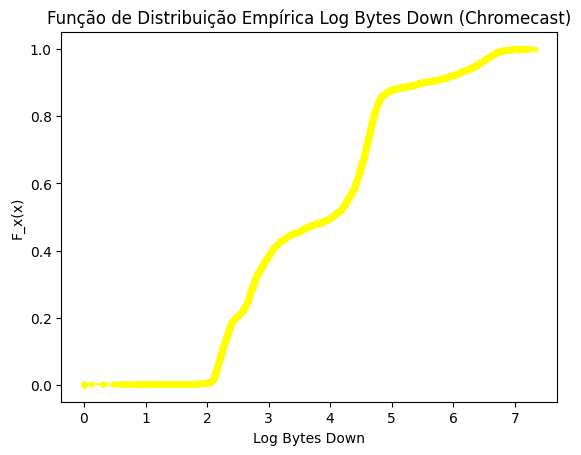

In [143]:
fig = plt.figure()
plt.plot(
    dados_chromecast["log_bytes_down"].sort_values(),
    np.linspace(0, 1, len(dados_chromecast["log_bytes_down"])),
    color="yellow",
    marker=".",
)
plt.xlabel("Log Bytes Down")
plt.ylabel("F_x(x)")
plt.title("Função de Distribuição Empírica Log Bytes Down (Chromecast)")
fig.savefig(
    "Gráficos\secao2\Distribuicao Empirica\Chromecast\chromecast_fde_log_bytes_down.png", 
    dpi=fig.dpi
)
plt.show()

#### SmartTV

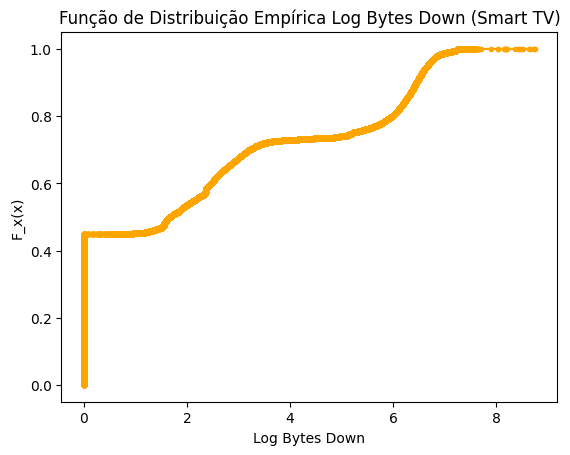

In [144]:
fig = plt.figure()
plt.plot(
    dados_smartTv["log_bytes_down"].sort_values(),
    np.linspace(0, 1, len(dados_smartTv["log_bytes_down"])),
    color="orange",
    marker=".",
)
plt.xlabel("Log Bytes Down")
plt.ylabel("F_x(x)")
plt.title("Função de Distribuição Empírica Log Bytes Down (Smart TV)")
fig.savefig(
    "Gráficos\secao2\Distribuicao Empirica\SmartTV\smart-tv_fde_log_bytes_down.png", 
    dpi=fig.dpi
)
plt.show()

## Boxplot

### Log₁₀(Bytes Up) e Log₁₀(Bytes Down)

#### Chromecast

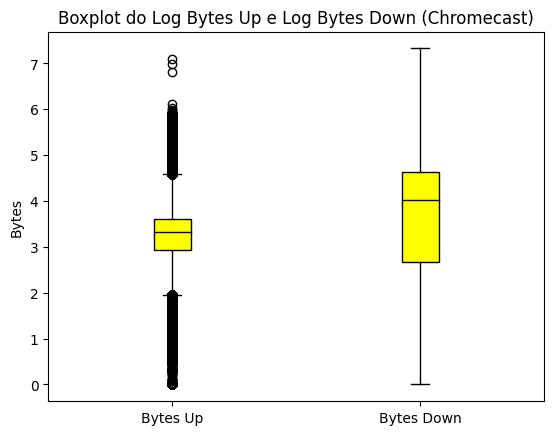

In [145]:
fig = plt.figure()
plt.boxplot(
    [dados_chromecast["log_bytes_up"], dados_chromecast["log_bytes_down"]],
    labels=["Bytes Up", "Bytes Down"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("Bytes")
plt.title("Boxplot do Log Bytes Up e Log Bytes Down (Chromecast)")
fig.savefig(
    "Gráficos\secao2\Boxplot\chromecast_boxplot_log_bytes_up_down.png",
    dpi=fig.dpi,
)
plt.show()

#### SmartTV

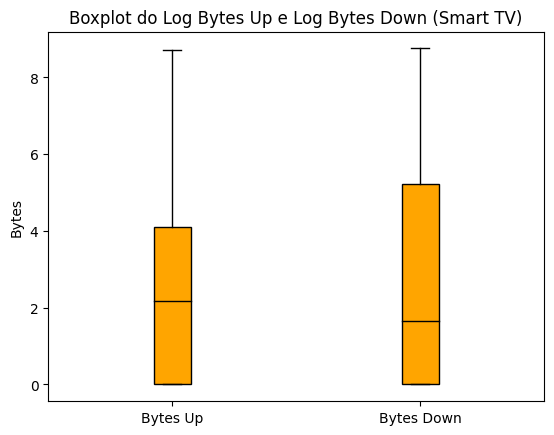

In [146]:
fig = plt.figure()
plt.boxplot(
    [dados_smartTv["log_bytes_up"], dados_smartTv["log_bytes_down"]],
    labels=["Bytes Up", "Bytes Down"],
    patch_artist=True,
    boxprops=dict(facecolor="orange", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("Bytes")
plt.title("Boxplot do Log Bytes Up e Log Bytes Down (Smart TV)")
fig.savefig(
    "Gráficos\secao2\Boxplot\smart_tv_boxplot_log_bytes_up_down.png", 
    dpi=fig.dpi
)
plt.show()

## Média, Variância e Desvio Padrão

### Chromecast

In [147]:
chromecast_bytes_up_down_media_var_desvp = pd.DataFrame(
    {
        "Log Bytes Up": [
            dados_chromecast["log_bytes_up"].mean(),
            dados_chromecast["log_bytes_up"].var(),
            dados_chromecast["log_bytes_up"].std(),
        ],
        "Log Bytes Down": [
            dados_chromecast["log_bytes_down"].mean(),
            dados_chromecast["log_bytes_down"].var(),
            dados_chromecast["log_bytes_down"].std(),
        ],
    },
    index=["Média", "Variância", "Desvio Padrão"],
)


print(chromecast_bytes_up_down_media_var_desvp.to_markdown())

|               |   Log Bytes Up |   Log Bytes Down |
|:--------------|---------------:|-----------------:|
| Média         |       3.3503   |          3.80005 |
| Variância     |       0.459969 |          1.6639  |
| Desvio Padrão |       0.67821  |          1.28992 |


### SmartTV

In [148]:
smart_tv_bytes_up_down_media_var_desvp = pd.DataFrame(
    {
        "Log Bytes Up": [
            dados_smartTv["log_bytes_up"].mean(),
            dados_smartTv["log_bytes_up"].var(),
            dados_smartTv["log_bytes_up"].std(),
        ],
        "Log Bytes Down": [
            dados_smartTv["log_bytes_down"].mean(),
            dados_smartTv["log_bytes_down"].var(),
            dados_smartTv["log_bytes_down"].std(),
        ],
    },
    index=["Média", "Variância", "Desvio Padrão"],
)

print(smart_tv_bytes_up_down_media_var_desvp.to_markdown())

|               |   Log Bytes Up |   Log Bytes Down |
|:--------------|---------------:|-----------------:|
| Média         |        2.15829 |          2.35168 |
| Variância     |        4.11014 |          6.72132 |
| Desvio Padrão |        2.02735 |          2.59255 |


# Estatísticas por Horário

## Boxplot

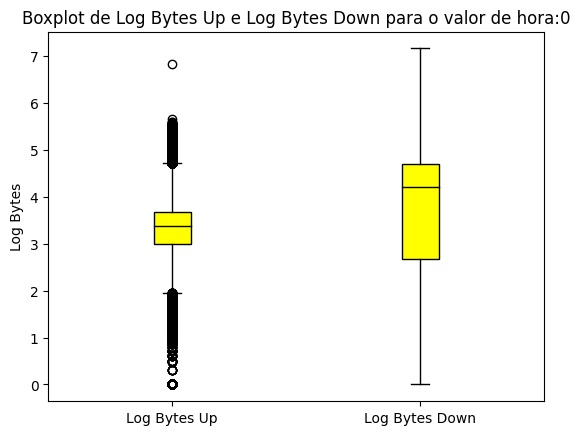

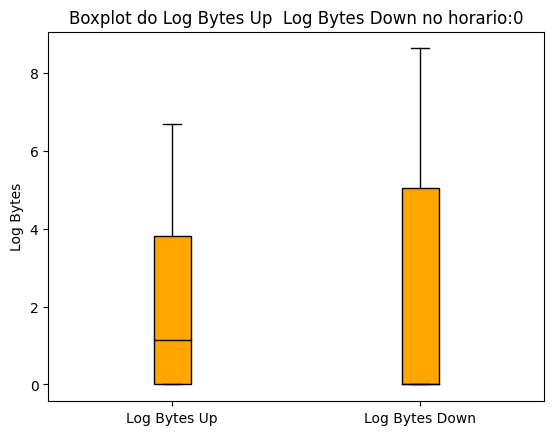

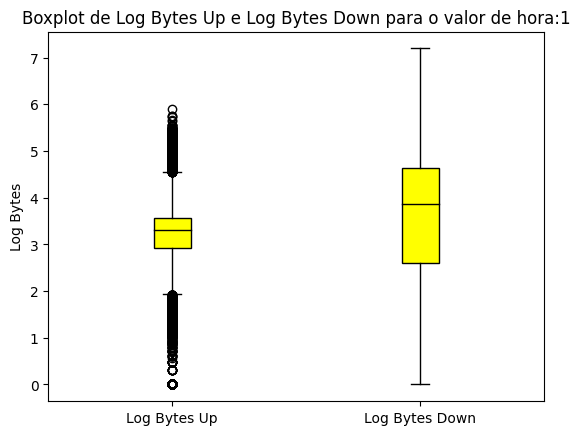

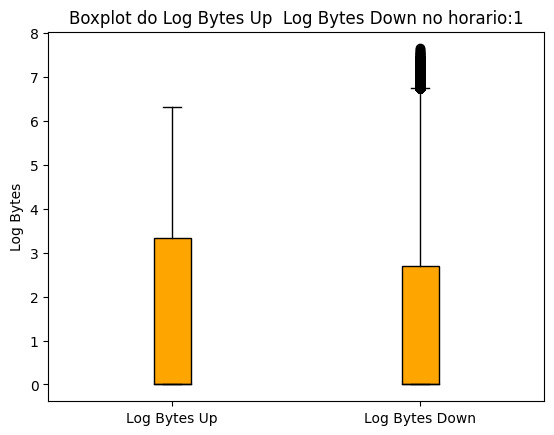

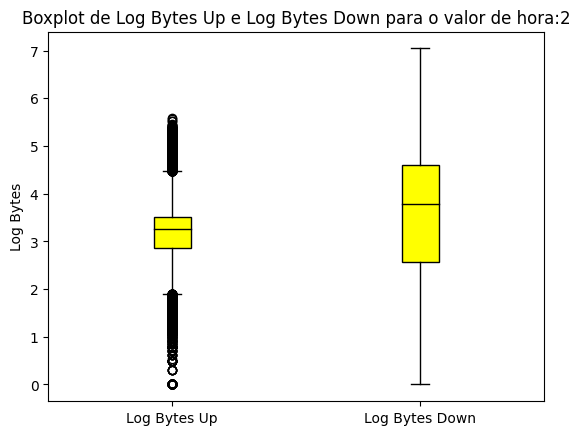

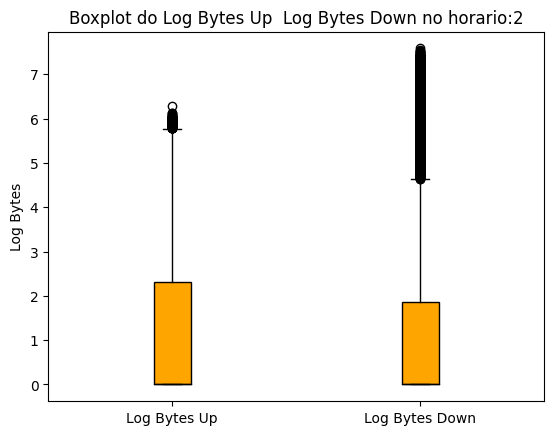

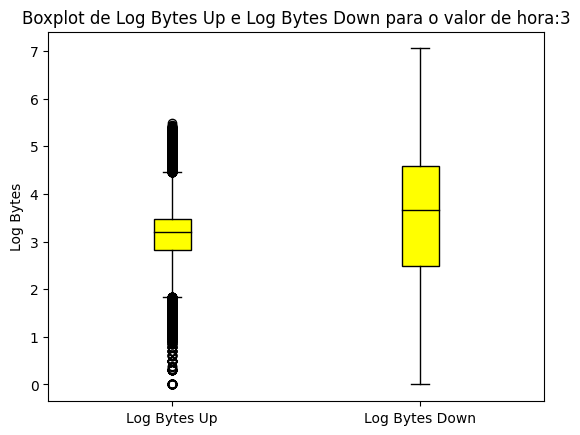

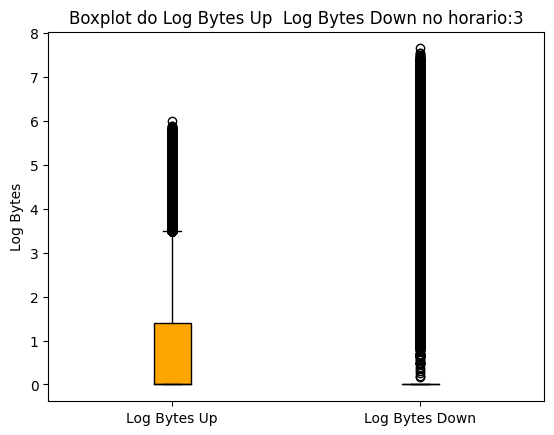

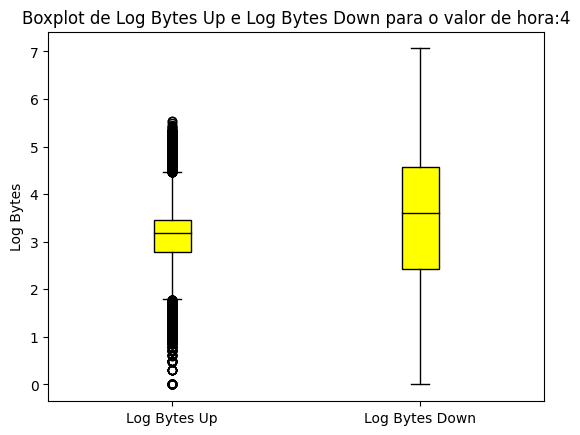

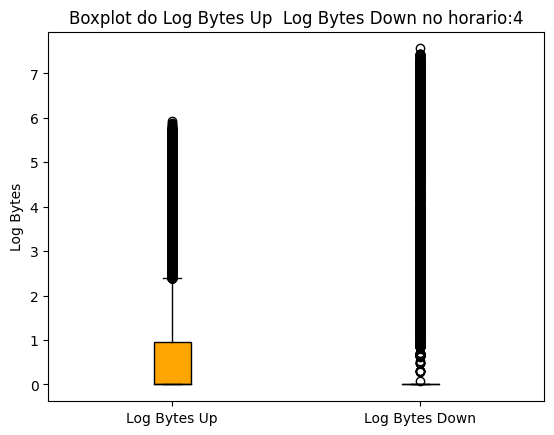

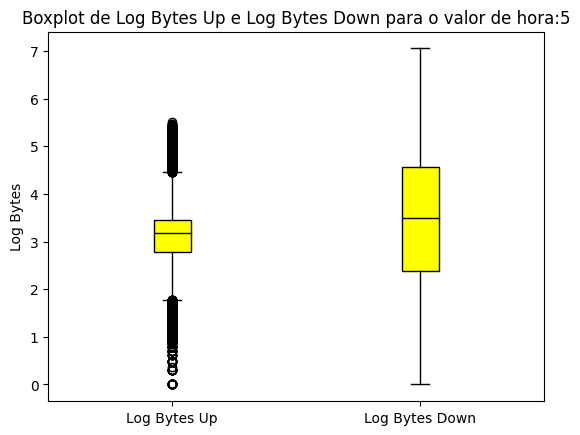

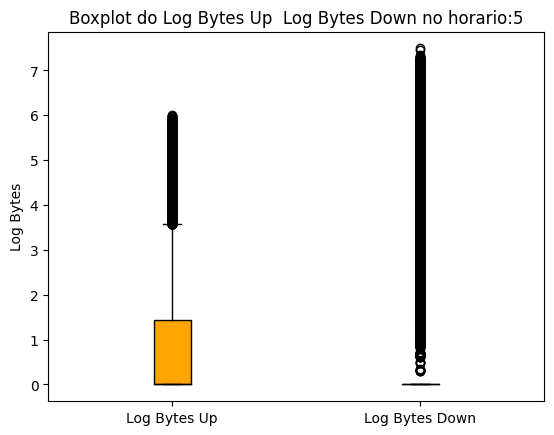

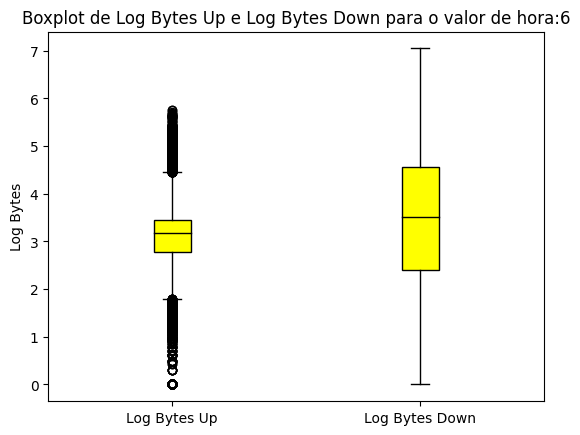

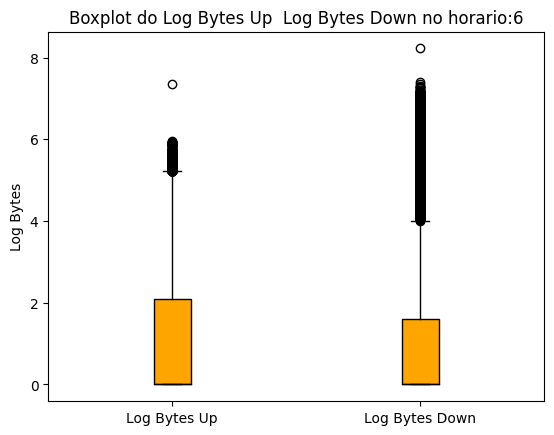

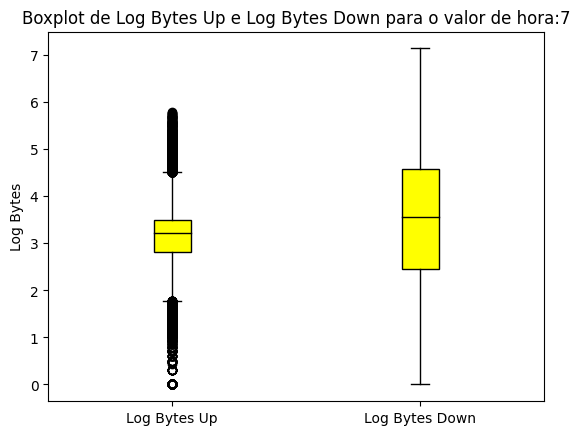

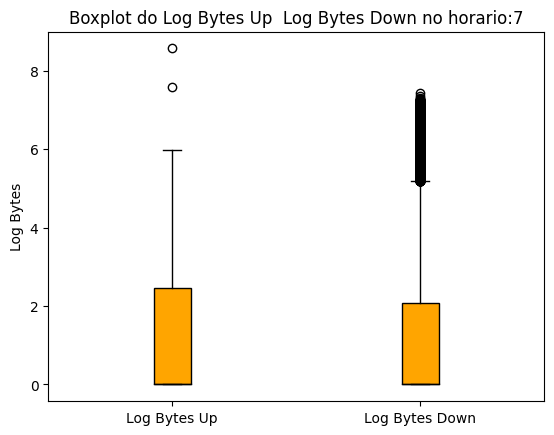

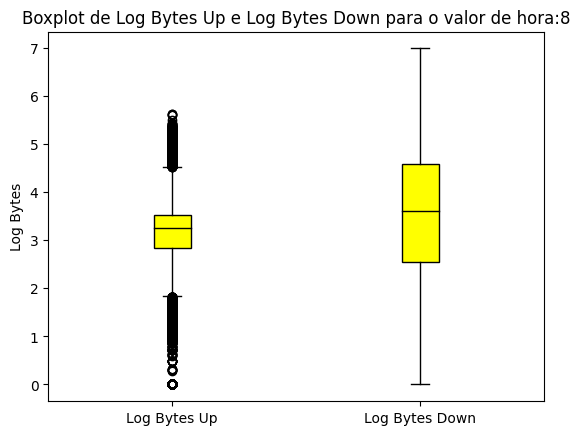

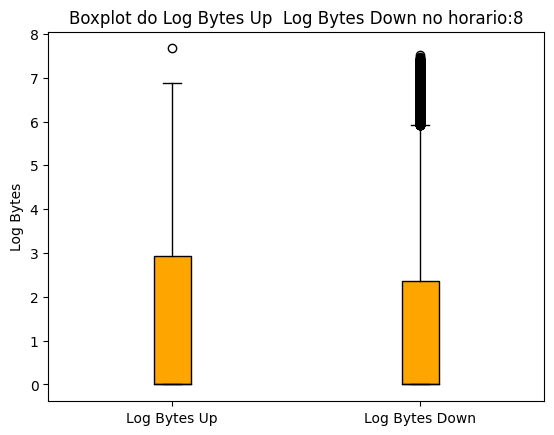

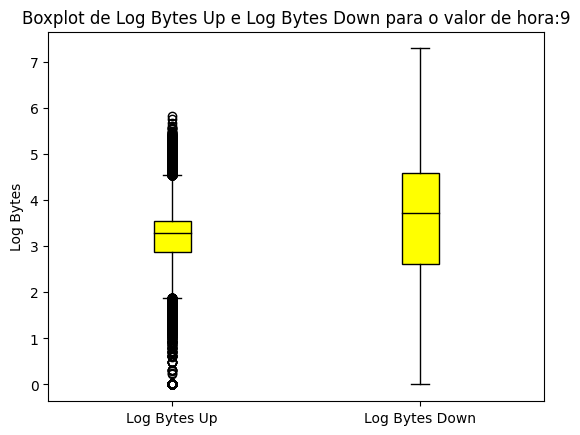

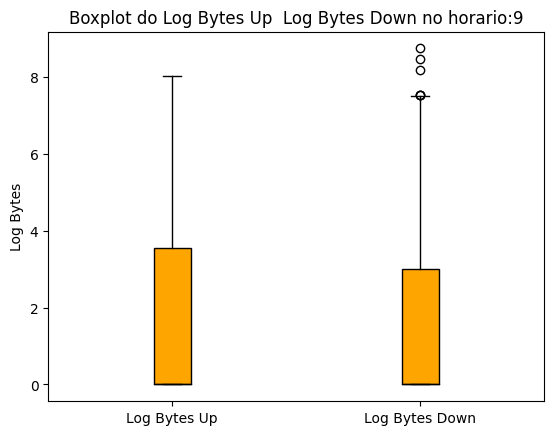

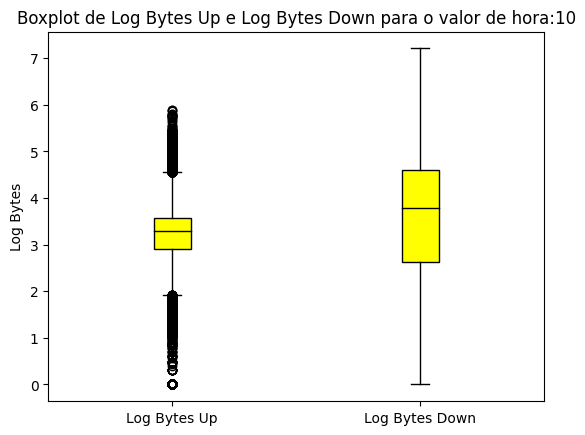

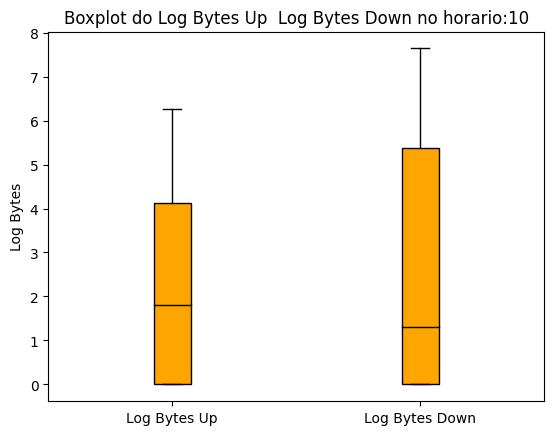

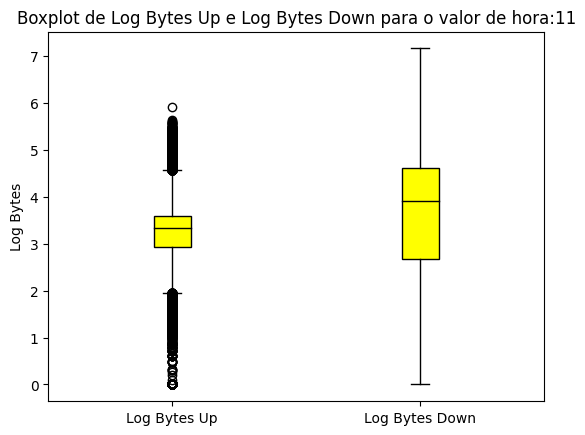

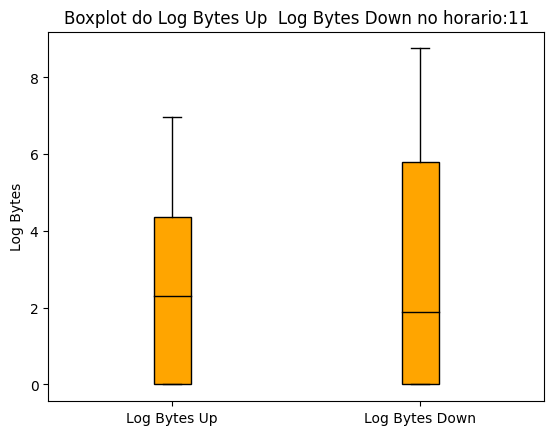

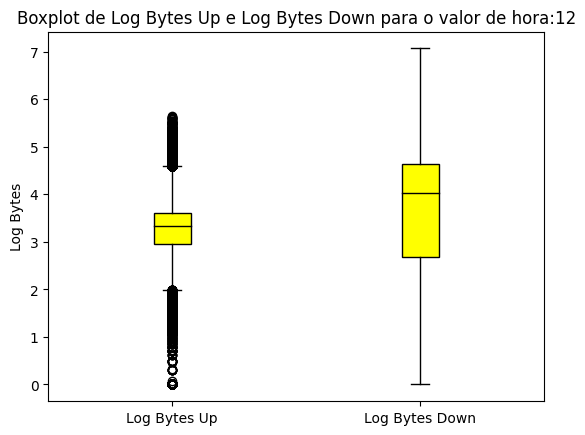

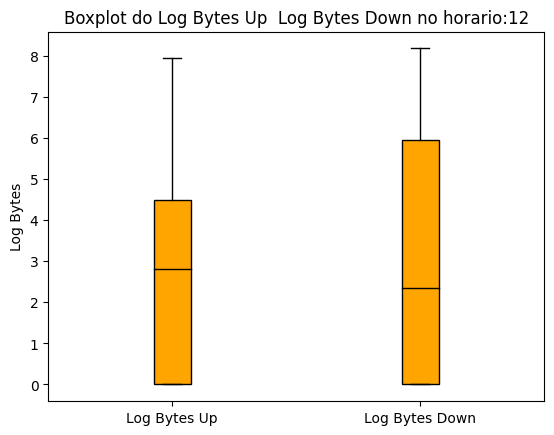

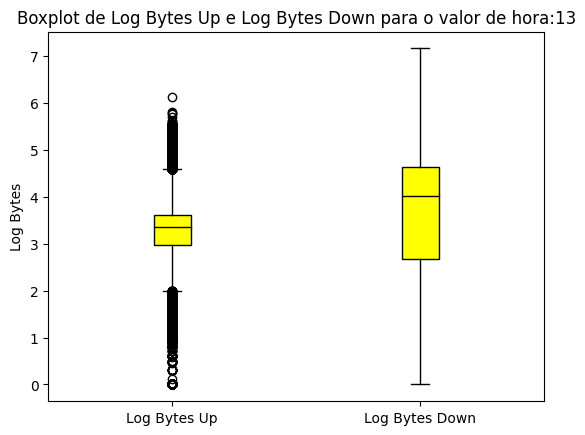

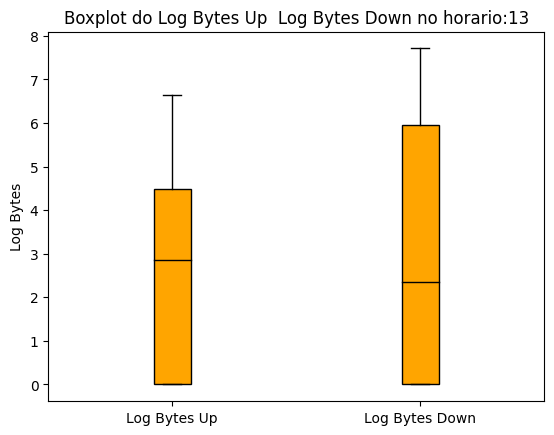

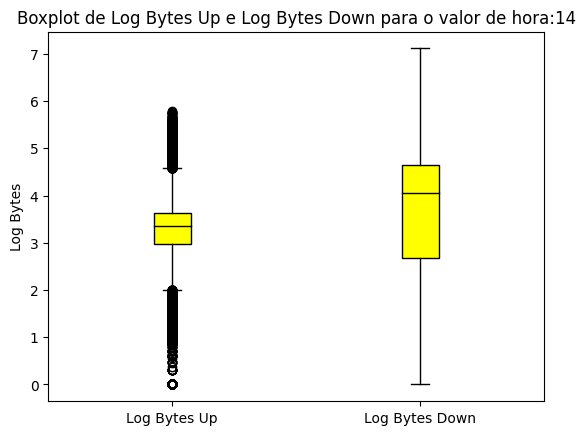

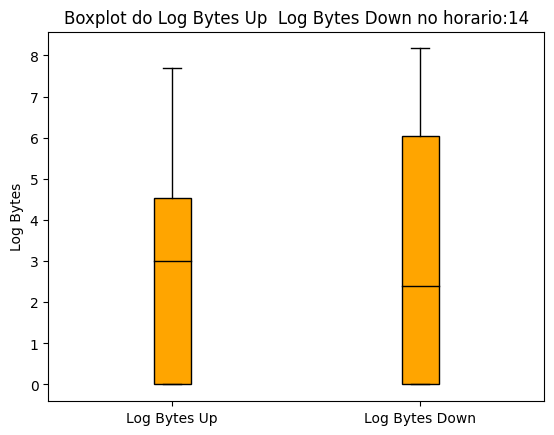

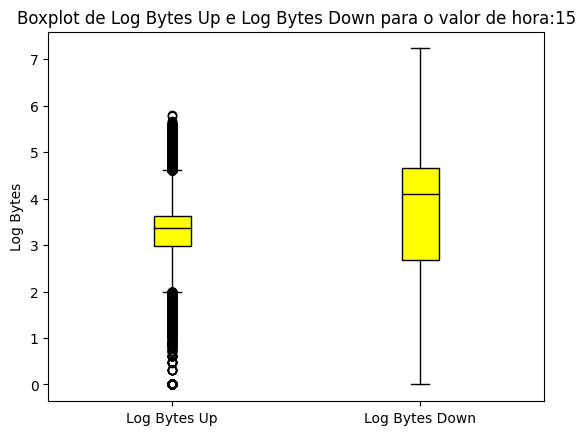

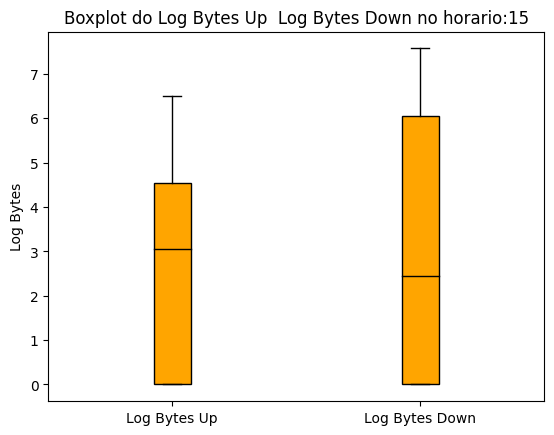

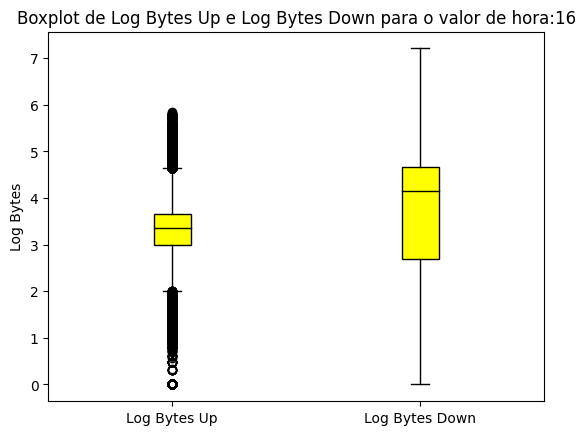

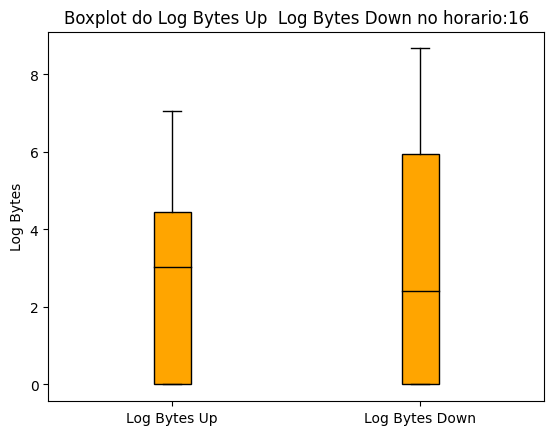

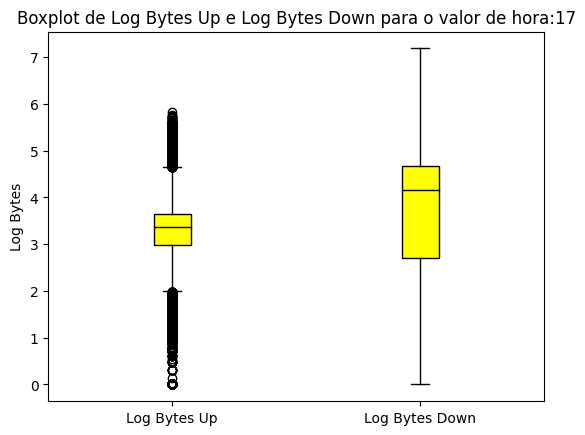

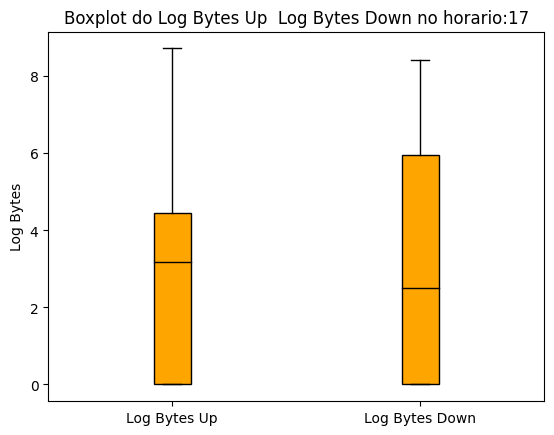

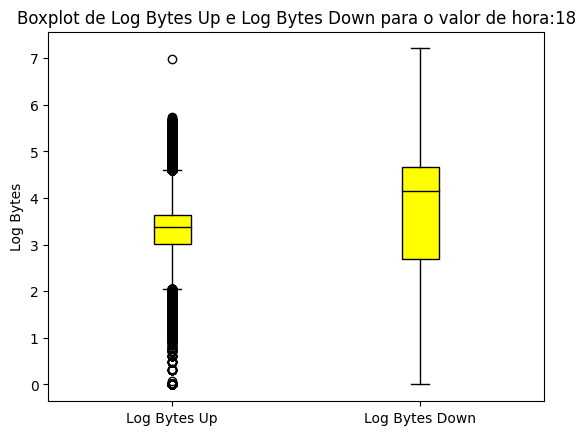

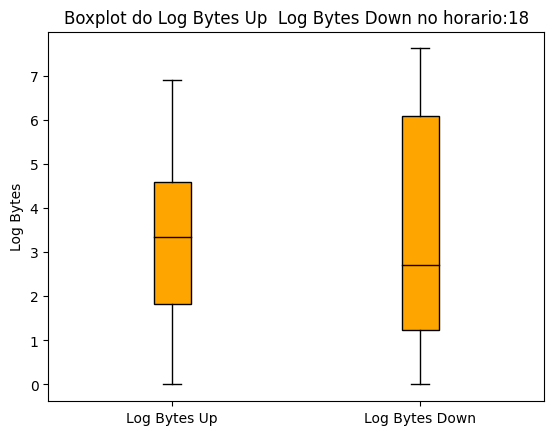

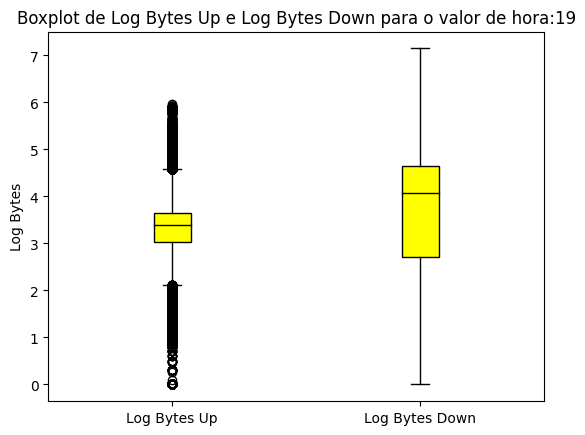

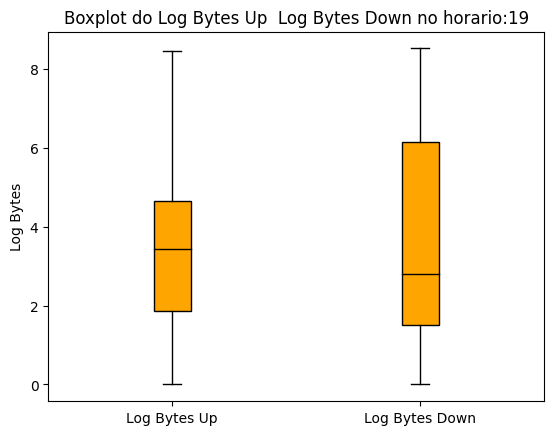

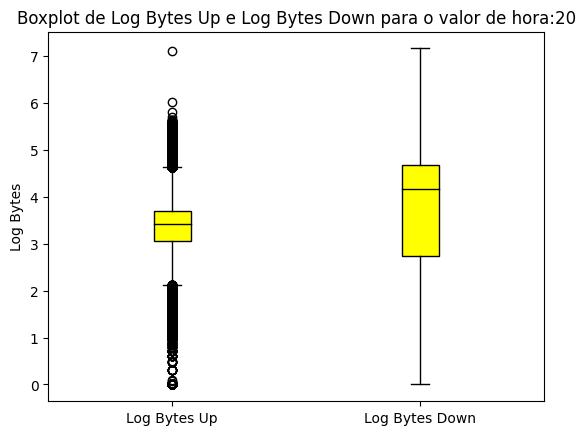

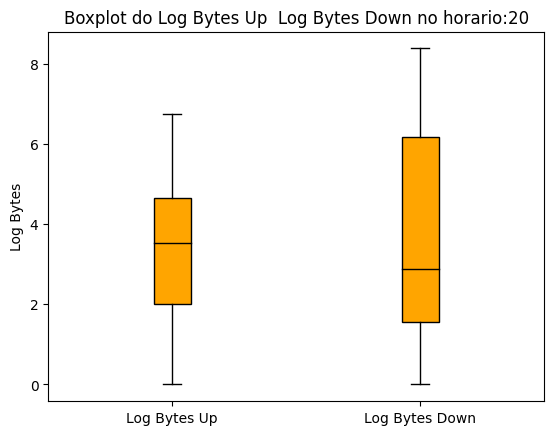

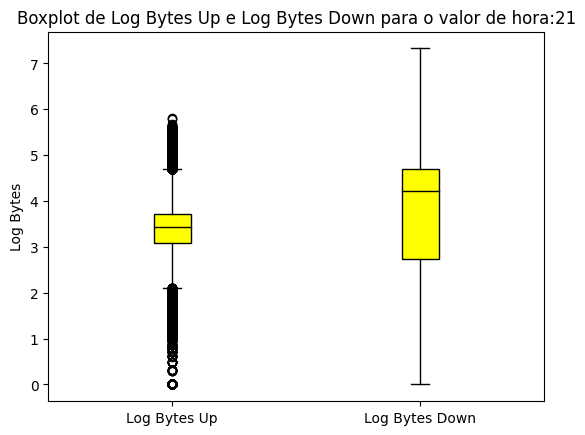

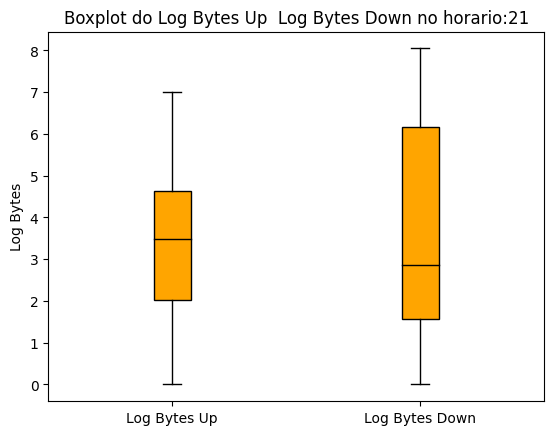

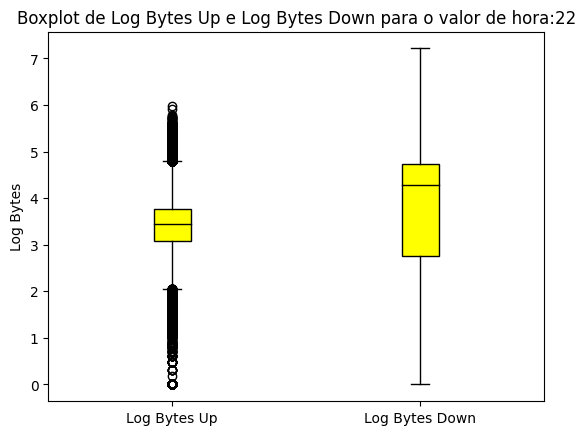

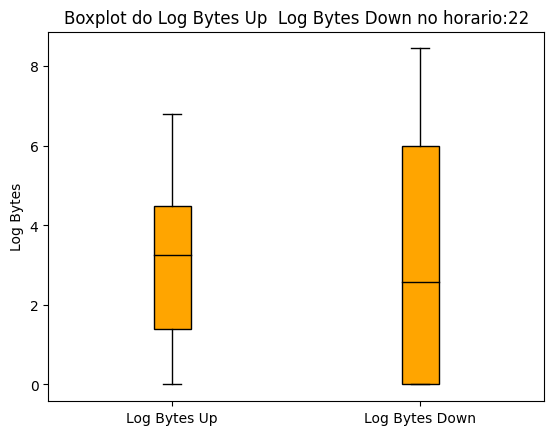

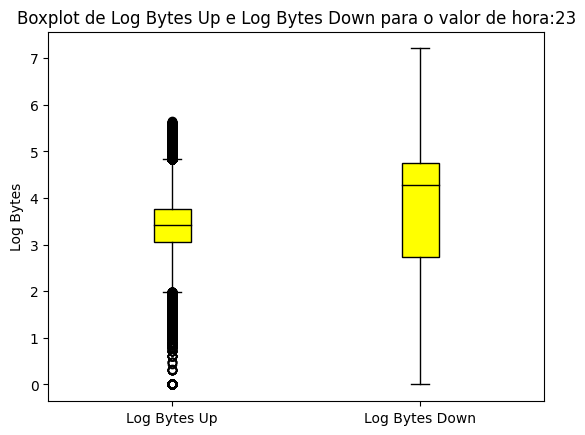

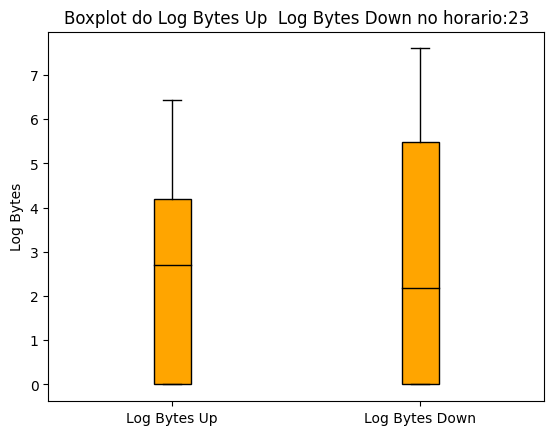

In [149]:
for horario in range(24):
    #Chromecast
    fig = plt.figure()
    plt.boxplot(
        [
            dados_chromecast[dados_chromecast["hour"] == horario]["log_bytes_up"],
            dados_chromecast[dados_chromecast["hour"] == horario]["log_bytes_down"],
        ],
        labels=["Log Bytes Up", "Log Bytes Down"],
        patch_artist=True,
        boxprops = dict(facecolor = "yellow", color = "black"),
        medianprops = dict(color = "black"),
        whiskerprops = dict(color = "black"),
        capprops = dict(color = "black"),
    )
    plt.ylabel("Log Bytes")
    plt.title("Boxplot de Log Bytes Up e Log Bytes Down para o valor de hora:" + str(horario))
    fig.savefig(
        f"Gráficos\secao3\Boxplot\Chromecast\chromecast_boxplot_log_bytes_up_down_horario_{horario}.png",
        dpi=fig.dpi,
    )
    plt.show()


    #SmartTV
    fig = plt.figure()
    plt.boxplot(
        [
            dados_smartTv[dados_smartTv["hour"] == horario]["log_bytes_up"],
            dados_smartTv[dados_smartTv["hour"] == horario]["log_bytes_down"],
        ],
        labels=["Log Bytes Up", "Log Bytes Down"],
        patch_artist=True,
        boxprops=dict(facecolor="orange", color="black"),
        medianprops=dict(color="black"),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
    )
    plt.ylabel("Log Bytes")
    plt.title("Boxplot do Log Bytes Up  Log Bytes Down no horario:" + str(horario))
    fig.savefig(
        f"Gráficos\secao3\Boxplot\SmartTV\smart_tv_boxplot_log_bytes_up_down_hour_{horario}.png",
        dpi=fig.dpi,
    )
    plt.show()

## Média, Variância e Desvio Padrão

### Log(Bytes Up)

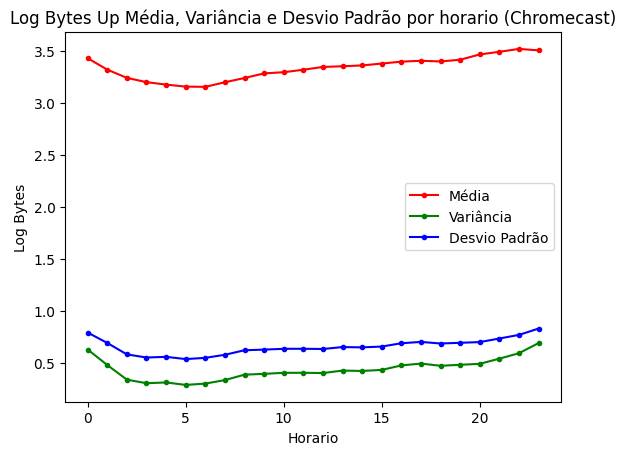

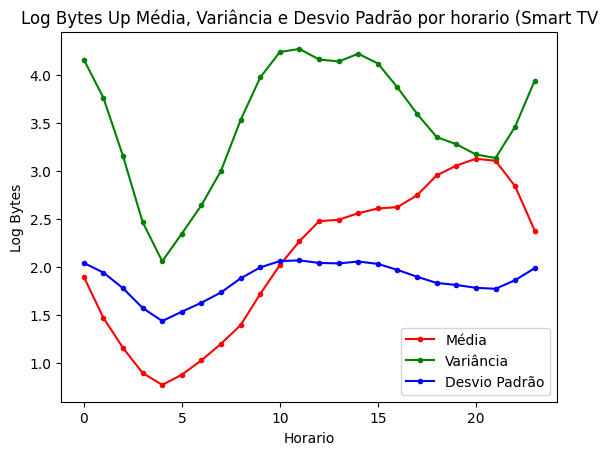

In [150]:
#Chromecast
fig = plt.figure()
plt.plot(dados_chromecast.groupby("hour")["log_bytes_up"].mean(), color="red", marker=".")
plt.plot(dados_chromecast.groupby("hour")["log_bytes_up"].var(), color="green", marker=".")
plt.plot(dados_chromecast.groupby("hour")["log_bytes_up"].std(), color="blue", marker=".")
plt.xlabel("Horario")
plt.ylabel("Log Bytes")
plt.legend(["Média", "Variância", "Desvio Padrão"])
plt.title("Log Bytes Up Média, Variância e Desvio Padrão por horario (Chromecast)")
fig.savefig(
    "Gráficos\secao3\Media_Var_Desvp\chromecast_estatisticas_log_bytes_up_harario.png",

    dpi=fig.dpi,
)
plt.show()


#SmartTV
fig = plt.figure()
plt.plot(dados_smartTv.groupby("hour")["log_bytes_up"].mean(), color="red", marker=".")
plt.plot(dados_smartTv.groupby("hour")["log_bytes_up"].var(), color="green", marker=".")

plt.plot(dados_smartTv.groupby("hour")["log_bytes_up"].std(), color="blue", marker=".")


plt.xlabel("Horario")
plt.ylabel("Log Bytes")
plt.legend(["Média", "Variância", "Desvio Padrão"])
plt.title("Log Bytes Up Média, Variância e Desvio Padrão por horario (Smart TV")
fig.savefig(
    "Gráficos\secao3\Media_Var_Desvp\smart-tv_estatisticas_log_bytes_up_harario.png",
    dpi=fig.dpi,
)

### Log(Bytes Down)

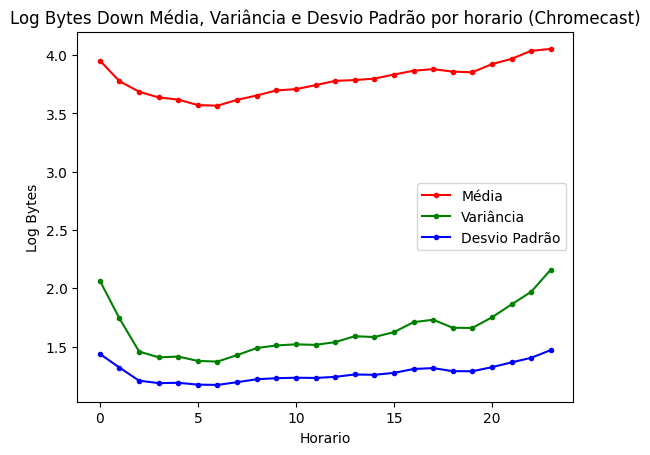

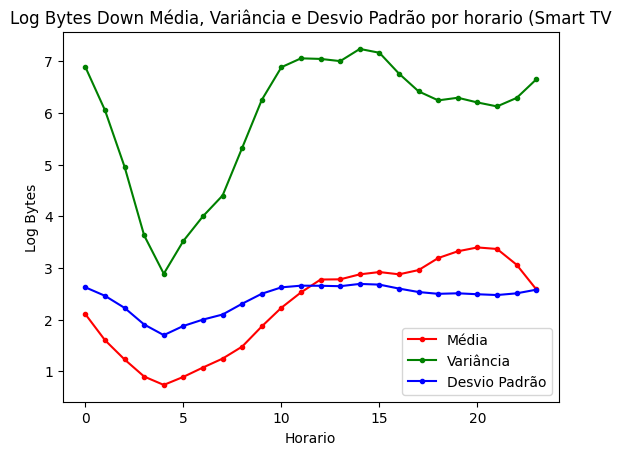

In [151]:
#Chromecast
fig = plt.figure()
plt.plot(dados_chromecast.groupby("hour")["log_bytes_down"].mean(), color="red", marker=".")
plt.plot(dados_chromecast.groupby("hour")["log_bytes_down"].var(), color="green", marker=".")
plt.plot(dados_chromecast.groupby("hour")["log_bytes_down"].std(), color="blue", marker=".")
plt.xlabel("Horario")
plt.ylabel("Log Bytes")
plt.legend(["Média", "Variância", "Desvio Padrão"])
plt.title("Log Bytes Down Média, Variância e Desvio Padrão por horario (Chromecast)")
fig.savefig(
    "Gráficos\secao3\Media_Var_Desvp\chromecast_estatisticas_log_bytes_down_harario.png",

    dpi=fig.dpi,
)
plt.show()


#SmartTV
fig = plt.figure()
plt.plot(dados_smartTv.groupby("hour")["log_bytes_down"].mean(), color="red", marker=".")
plt.plot(dados_smartTv.groupby("hour")["log_bytes_down"].var(), color="green", marker=".")

plt.plot(dados_smartTv.groupby("hour")["log_bytes_down"].std(), color="blue", marker=".")


plt.xlabel("Horario")
plt.ylabel("Log Bytes")
plt.legend(["Média", "Variância", "Desvio Padrão"])
plt.title("Log Bytes Down Média, Variância e Desvio Padrão por horario (Smart TV")
fig.savefig(
    "Gráficos\secao3\Media_Var_Desvp\smart-tv_estatisticas_log_bytes_down_harario.png",
    dpi=fig.dpi,
)

# Caracterizando os horários com maior valor de tráfego

## Filtragem dos Dados Necessários

### Chromecast

In [152]:
horario_com_mediana_maxima_Bup_chromecast = (dados_chromecast.groupby("hour")["log_bytes_up"].median().idxmax())
horario_com_media_maxima_Bup_chromecast = (dados_chromecast.groupby("hour")["log_bytes_up"].mean().idxmax())
horario_com_mediana_maxima_Bdown_chromecast = (dados_chromecast.groupby("hour")["log_bytes_down"].median().idxmax())
horario_com_media_maxima_Bdown_chromecast = (dados_chromecast.groupby("hour")["log_bytes_down"].mean().idxmax())

In [153]:
df_horario_maximo_chromecast = pd.DataFrame(
    {
        "Hour of Max Median": [
            horario_com_mediana_maxima_Bup_chromecast,
            horario_com_mediana_maxima_Bdown_chromecast,
        ],
        "Hour of Max Mean": [horario_com_media_maxima_Bup_chromecast, horario_com_media_maxima_Bdown_chromecast],
    },
    index=["Log(Bytes Up)", "Log(Bytes Down)"],
)

In [154]:
df_mediana_up_maxima_chromecast = dados_chromecast[
    (dados_chromecast["hour"] == horario_com_mediana_maxima_Bup_chromecast)
][["hour", "bytes_up", "log_bytes_up", "device_id"]]

df_media_up_maxima_chromecast = dados_chromecast[
    (dados_chromecast["hour"] == horario_com_media_maxima_Bup_chromecast)
][["hour", "bytes_up", "log_bytes_up", "device_id"]]

df_mediana_down_maxima_chromecast = dados_chromecast[
    (dados_chromecast["hour"] == horario_com_mediana_maxima_Bdown_chromecast)
][["hour", "bytes_down", "log_bytes_down", "device_id"]]

df_media_down_maxima_chromecast = dados_chromecast[
    (dados_chromecast["hour"] == horario_com_media_maxima_Bdown_chromecast)
][["hour", "bytes_down", "log_bytes_down", "device_id"]]


df_mediana_up_maxima_mesmo_horario_down_chromecast = dados_chromecast[
    (dados_chromecast["hour"] == horario_com_mediana_maxima_Bdown_chromecast)
][["hour", "bytes_up", "log_bytes_up", "device_id"]]

df_media_up_maxima_mesmo_horario_down_chromecast = dados_chromecast[
    (dados_chromecast["hour"] == horario_com_media_maxima_Bdown_chromecast)
][["hour", "bytes_up", "log_bytes_up", "device_id"]]



### SmartTV

In [155]:
horario_com_mediana_maxima_Bup_smart = (dados_smartTv.groupby("hour")["log_bytes_up"].median().idxmax())
horario_com_media_maxima_Bup_smart = (dados_smartTv.groupby("hour")["log_bytes_up"].mean().idxmax())
horario_com_mediana_maxima_Bdown_smart = (dados_smartTv.groupby("hour")["log_bytes_down"].median().idxmax())
horario_com_media_maxima_Bdown_smart = (dados_smartTv.groupby("hour")["log_bytes_down"].mean().idxmax())

In [156]:
df_horario_maximo_smart = pd.DataFrame(
    {
        "Hour of Max Median": [
            horario_com_mediana_maxima_Bup_smart,
            horario_com_mediana_maxima_Bdown_smart,
        ],
        "Hour of Max Mean": [horario_com_media_maxima_Bup_smart, horario_com_media_maxima_Bdown_smart],
    },
    index=["Log(Bytes Up)", "Log(Bytes Down)"],
)

In [157]:
df_mediana_up_maxima_smart = dados_smartTv[
    (dados_smartTv["hour"] == horario_com_mediana_maxima_Bup_smart)
][["hour", "bytes_up", "log_bytes_up", "device_id"]]

df_media_up_maxima_smart = dados_smartTv[
    (dados_smartTv["hour"] == horario_com_media_maxima_Bup_smart)
][["hour", "bytes_up", "log_bytes_up", "device_id"]]

df_mediana_down_maxima_smart = dados_smartTv[
    (dados_smartTv["hour"] == horario_com_mediana_maxima_Bdown_smart)
][["hour", "bytes_down", "log_bytes_down", "device_id"]]

df_media_down_maxima_smart = dados_smartTv[
    (dados_smartTv["hour"] == horario_com_media_maxima_Bdown_smart)
][["hour", "bytes_down", "log_bytes_down", "device_id"]]

df_mediana_up_maxima_mesmo_horario_down_smart = dados_smartTv[
    (dados_smartTv["hour"] == horario_com_mediana_maxima_Bdown_smart)
][["hour", "bytes_up", "log_bytes_up", "device_id"]]


df_media_up_maxima_mesmo_horario_down_smart = dados_smartTv[
    (dados_smartTv["hour"] == horario_com_media_maxima_Bdown_smart)
][["hour", "bytes_up", "log_bytes_up", "device_id"]]


## Histograma

### Chromecast

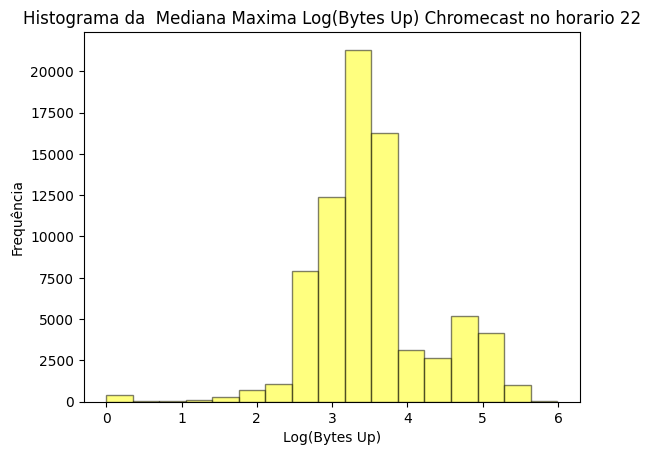

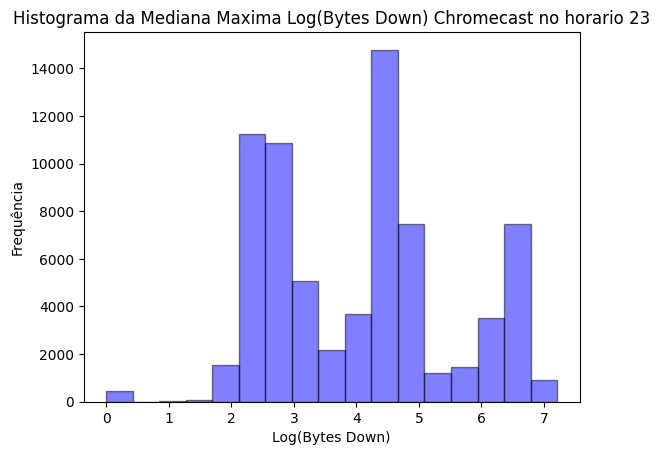

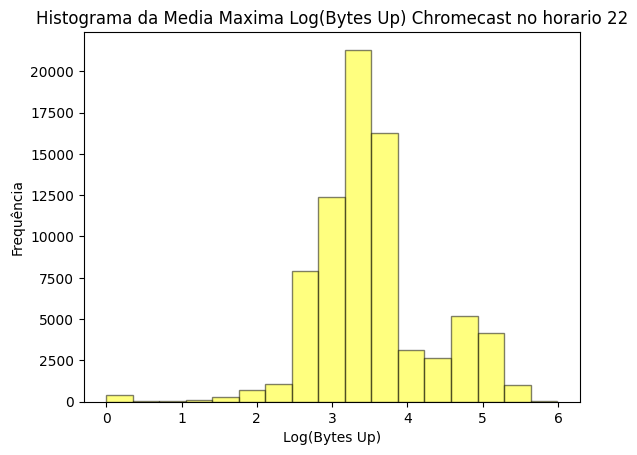

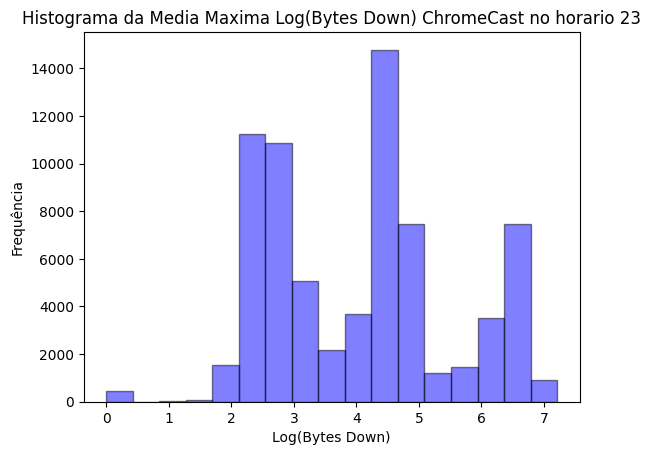

In [158]:
lista_dfs = [(df_mediana_up_maxima_chromecast, "log_bytes_up", " Mediana Maxima Log(Bytes Up) Chromecast", "chromecast_mediana_maxima_up"),
    (df_mediana_down_maxima_chromecast, "log_bytes_down", "Mediana Maxima Log(Bytes Down) Chromecast", "chromecast_mediana_maxima_down"),
    (df_media_up_maxima_chromecast, "log_bytes_up", "Media Maxima Log(Bytes Up) Chromecast", "chromecast_media_maxima_up"),
    (df_media_down_maxima_chromecast, "log_bytes_down", "Media Maxima Log(Bytes Down) ChromeCast", "chromecast_media_maxima_down"),
]

for df, coluna, nome, nome_da_figura in lista_dfs:
    chromecast_hist_bin = sturges(df[coluna])
    fig = plt.figure()
    plt.hist(
        df[coluna],
        bins=chromecast_hist_bin,
        color=("yellow" if coluna == "log_bytes_up" else "blue"),
        alpha=0.5,
        edgecolor="black",
    )
    plt.xlabel("Log(Bytes Up)" if coluna == "log_bytes_up" else "Log(Bytes Down)")
    plt.ylabel("Frequência")
    plt.title(f"Histograma da {nome} no horario {df['hour'].iloc[0]}")
    fig.savefig(
        f"Gráficos\secao4\Histograma\Chromecast\chromecast_hist_{nome_da_figura}.png",
        dpi=fig.dpi,
    )

### SmartTV

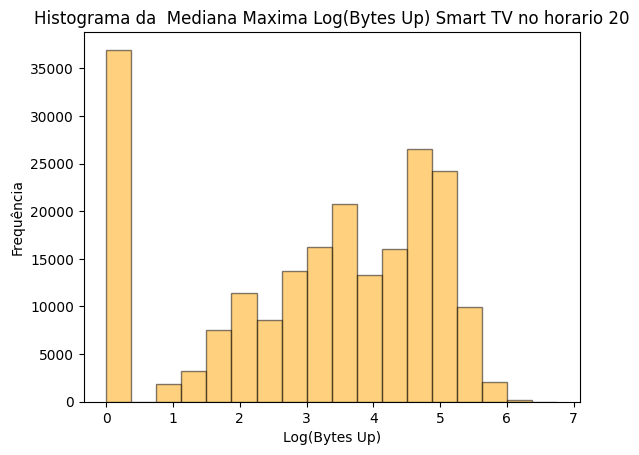

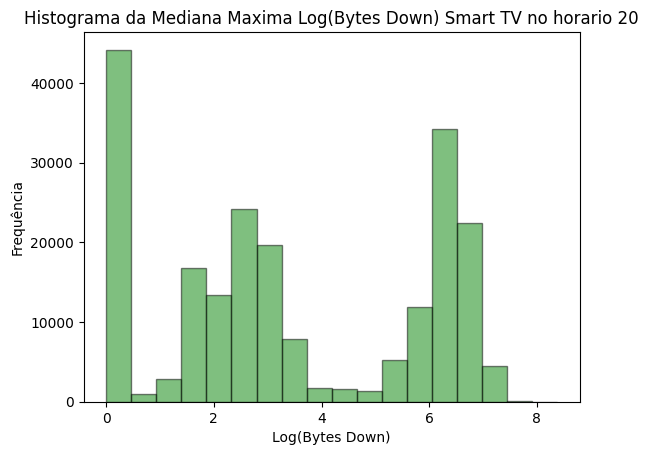

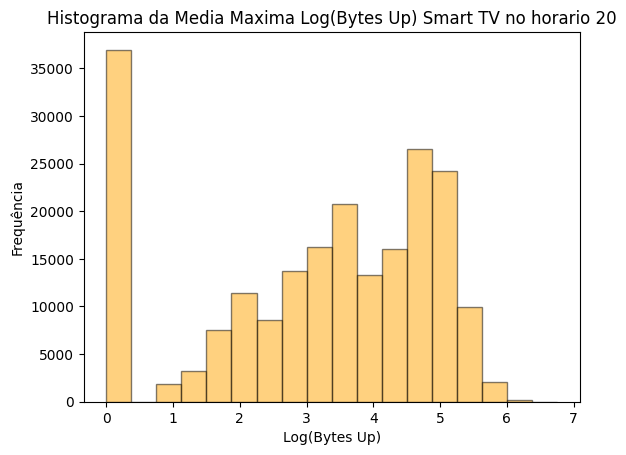

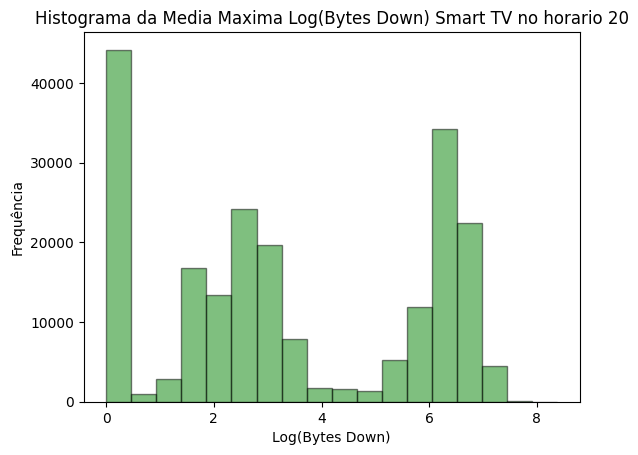

In [159]:
lista_dfs = [(df_mediana_up_maxima_smart, "log_bytes_up", " Mediana Maxima Log(Bytes Up) Smart TV", "smart-tv_mediana_maxima_up"),
    (df_mediana_down_maxima_smart, "log_bytes_down", "Mediana Maxima Log(Bytes Down) Smart TV", "smart-tv_mediana_maxima_down"),
    (df_media_up_maxima_smart, "log_bytes_up", "Media Maxima Log(Bytes Up) Smart TV", "smart-tv_media_maxima_up"),
    (df_media_down_maxima_smart, "log_bytes_down", "Media Maxima Log(Bytes Down) Smart TV", "smart-tv_media_maxima_down"),
]

for df, coluna, nome, nome_da_figura in lista_dfs:
    smart_hist_bin = sturges(df[coluna])
    fig = plt.figure()
    plt.hist(
        df[coluna],
        bins= smart_hist_bin,
        color=("orange" if coluna == "log_bytes_up" else "green"),
        alpha=0.5,
        edgecolor="black",
    )
    plt.xlabel("Log(Bytes Up)" if coluna == "log_bytes_up" else "Log(Bytes Down)")
    plt.ylabel("Frequência")
    plt.title(f"Histograma da {nome} no horario {df['hour'].iloc[0]}")
    fig.savefig(
        f"Gráficos\secao4\Histograma\Smart TV\hist_{nome_da_figura}.png",
        dpi=fig.dpi,
    )

## MLE

### Gamma

#### Chormecast

In [160]:
lista_dfs = [
    (df_mediana_up_maxima_chromecast, "log_bytes_up", "Mediana Maxima Log(Bytes Up) Chromecast"),
    (df_media_down_maxima_chromecast, "log_bytes_down", "Mediana Maxima Log(Bytes Down) Chromecast"),
    (df_media_up_maxima_chromecast, "log_bytes_up", "Media Maxima Log(Bytes Up) Chromecast"),
    (df_media_down_maxima_chromecast, "log_bytes_down", "Media Maxima Log(Bytes Down) ChromeCast"),
]

for df, coluna, nome in lista_dfs:
    shape, loc, scale = gamma.fit(df[coluna])
    df_gamma = pd.DataFrame(
        {
            "shape": [shape], 
            "loc": [loc], 
            "scale": [scale]
        }
    )
    print(f"Distribuição Gamma para a {nome} no horario {df['hour'].iloc[0]}\n")
    print(df_gamma.to_markdown())
    print()

Distribuição Gamma para a Mediana Maxima Log(Bytes Up) Chromecast no horario 22

|    |   shape |     loc |     scale |
|---:|--------:|--------:|----------:|
|  0 | 3148.88 | -39.809 | 0.0137606 |

Distribuição Gamma para a Mediana Maxima Log(Bytes Down) Chromecast no horario 23

|    |   shape |      loc |   scale |
|---:|--------:|---------:|--------:|
|  0 | 27.1301 | -3.63137 | 0.28323 |

Distribuição Gamma para a Media Maxima Log(Bytes Up) Chromecast no horario 22

|    |   shape |     loc |     scale |
|---:|--------:|--------:|----------:|
|  0 | 3148.88 | -39.809 | 0.0137606 |

Distribuição Gamma para a Media Maxima Log(Bytes Down) ChromeCast no horario 23

|    |   shape |      loc |   scale |
|---:|--------:|---------:|--------:|
|  0 | 27.1301 | -3.63137 | 0.28323 |



#### SmartTV

In [161]:
lista_dfs = [
    (df_mediana_up_maxima_smart, "log_bytes_up", "Mediana Maxima Log(Bytes Up) Smart TV"),
    (df_media_down_maxima_smart, "log_bytes_down", "Mediana Maxima Log(Bytes Down) Smart TV"),
    (df_media_up_maxima_smart, "log_bytes_up", "Media Maxima Log(Bytes Up) Smart TV"),
    (df_media_down_maxima_smart, "log_bytes_down", "Media Maxima Log(Bytes Down) Smart TV"),
]

for df, coluna, nome in lista_dfs:
    shape, loc, scale = gamma.fit(df[coluna])
    df_gamma = pd.DataFrame(
        {
            "shape": [shape], 
            "loc": [loc], 
            "scale": [scale]
        }
    )
    print(f"Distribuição Gamm para a {nome} no horario {df['hour'].iloc[0]}\n")
    print(df_gamma.to_markdown())
    print()

Distribuição Gamm para a Mediana Maxima Log(Bytes Up) Smart TV no horario 20

|    |   shape |      loc |    scale |
|---:|--------:|---------:|---------:|
|  0 | 217.147 | -23.8596 | 0.124245 |

Distribuição Gamm para a Mediana Maxima Log(Bytes Down) Smart TV no horario 20

|    |   shape |      loc |     scale |
|---:|--------:|---------:|----------:|
|  0 | 896.547 | -71.0622 | 0.0830499 |

Distribuição Gamm para a Media Maxima Log(Bytes Up) Smart TV no horario 20

|    |   shape |      loc |    scale |
|---:|--------:|---------:|---------:|
|  0 | 217.147 | -23.8596 | 0.124245 |

Distribuição Gamm para a Media Maxima Log(Bytes Down) Smart TV no horario 20

|    |   shape |      loc |     scale |
|---:|--------:|---------:|----------:|
|  0 | 896.547 | -71.0622 | 0.0830499 |



### Gaussian

#### Chromecast

In [162]:
lista_dfs = [
    (df_mediana_up_maxima_chromecast, "log_bytes_up", "Mediana Maxima Log(Bytes Up) Chromecast"),
    (df_media_down_maxima_chromecast, "log_bytes_down", "Mediana Maxima Log(Bytes Down) Chromecast"),
    (df_media_up_maxima_chromecast, "log_bytes_up", "Media Maxima Log(Bytes Up) Chromecast"),
    (df_media_down_maxima_chromecast, "log_bytes_down", "Media Maxima Log(Bytes Down) ChromeCast"),
]
for df, coluna, nome in lista_dfs:
    df_media_mediana = pd.DataFrame(
        {
            "mean": [df[coluna].mean()], 
            "median": [df[coluna].median()]
        }
    )

    print(f"Distribuição Gaussiana para a {nome} no horario {df['hour'].iloc[0]}")
    print(df_media_mediana.to_markdown())
    print()

Distribuição Gaussiana para a Mediana Maxima Log(Bytes Up) Chromecast no horario 22
|    |    mean |   median |
|---:|--------:|---------:|
|  0 | 3.52155 |   3.4438 |

Distribuição Gaussiana para a Mediana Maxima Log(Bytes Down) Chromecast no horario 23
|    |   mean |   median |
|---:|-------:|---------:|
|  0 | 4.0527 |  4.28566 |

Distribuição Gaussiana para a Media Maxima Log(Bytes Up) Chromecast no horario 22
|    |    mean |   median |
|---:|--------:|---------:|
|  0 | 3.52155 |   3.4438 |

Distribuição Gaussiana para a Media Maxima Log(Bytes Down) ChromeCast no horario 23
|    |   mean |   median |
|---:|-------:|---------:|
|  0 | 4.0527 |  4.28566 |



#### SmartTV

In [163]:
lista_dfs = [
    (df_mediana_up_maxima_smart, "log_bytes_up", "Mediana Maxima Log(Bytes Up) Smart TV"),
    (df_media_down_maxima_smart, "log_bytes_down", "Mediana Maxima Log(Bytes Down) Smart TV"),
    (df_media_up_maxima_smart, "log_bytes_up", "Media Maxima Log(Bytes Up) Smart TV"),
    (df_media_down_maxima_smart, "log_bytes_down", "Media Maxima Log(Bytes Down) Smart TV"),
]
for df, coluna, nome in lista_dfs:
    df_media_mediana = pd.DataFrame(
        {
            "mean": [df[coluna].mean()], 
            "median": [df[coluna].median()]
        }
    )

    print(f"Distribuição Gaussiana para a {nome} no horario {df['hour'].iloc[0]}")
    print(df_media_mediana.to_markdown())
    print()

Distribuição Gaussiana para a Mediana Maxima Log(Bytes Up) Smart TV no horario 20
|    |    mean |   median |
|---:|--------:|---------:|
|  0 | 3.12426 |  3.53052 |

Distribuição Gaussiana para a Mediana Maxima Log(Bytes Down) Smart TV no horario 20
|    |    mean |   median |
|---:|--------:|---------:|
|  0 | 3.39609 |  2.88961 |

Distribuição Gaussiana para a Media Maxima Log(Bytes Up) Smart TV no horario 20
|    |    mean |   median |
|---:|--------:|---------:|
|  0 | 3.12426 |  3.53052 |

Distribuição Gaussiana para a Media Maxima Log(Bytes Down) Smart TV no horario 20
|    |    mean |   median |
|---:|--------:|---------:|
|  0 | 3.39609 |  2.88961 |



## Histograma com o MLE

### Chromecast

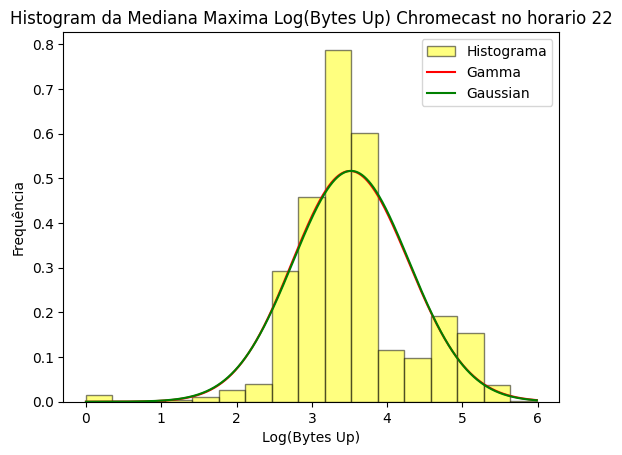

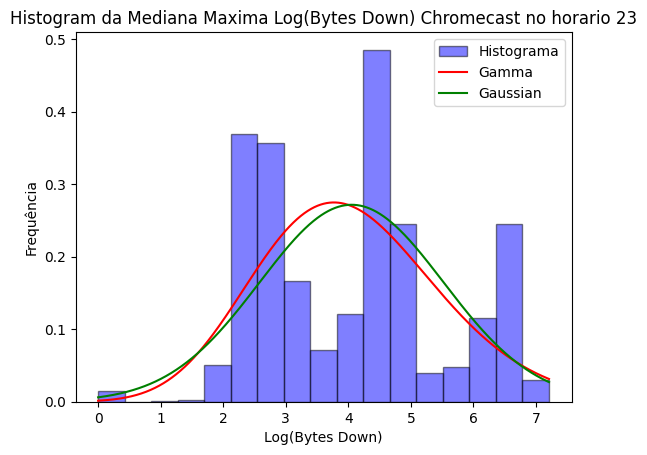

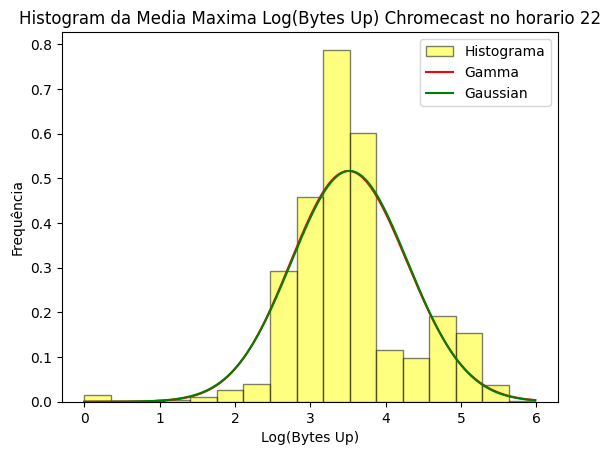

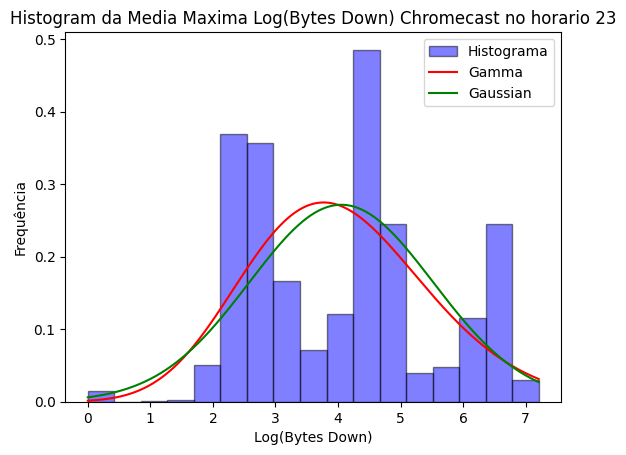

In [164]:
lista_dfs = [
    (df_mediana_up_maxima_chromecast, "log_bytes_up", "Mediana Maxima Log(Bytes Up) Chromecast", "log_bytes_up_max_median"),
    (df_mediana_down_maxima_chromecast, "log_bytes_down", "Mediana Maxima Log(Bytes Down) Chromecast", "log_bytes_down_max_median"),
    (df_media_up_maxima_chromecast, "log_bytes_up", "Media Maxima Log(Bytes Up) Chromecast", "log_bytes_up_max_mean"),
    (df_media_down_maxima_chromecast, "log_bytes_down", "Media Maxima Log(Bytes Down) Chromecast", "log_bytes_down_max_mean"),
]


for df, coluna, nome, nome_da_coluna in lista_dfs:
    fig = plt.figure()
    chromecast_hist_bin = sturges(df[coluna])
    plt.hist(
        df[coluna],
        bins=chromecast_hist_bin,
        color=("yellow" if coluna == "log_bytes_up" else "blue"),
        alpha=0.5,
        edgecolor="black",
        label="Histograma",
        density=True,
    )

    x = np.linspace(df[coluna].min(), df[coluna].max(), len(df[coluna]))

    shape, loc, scale = gamma.fit(df[coluna])
    gamma_distribution = gamma.pdf(x, shape, loc, scale)

    mean, std = norm.fit(df[coluna])
    gaussian_distribution = norm.pdf(x, mean, std)

    plt.plot(x, gamma_distribution, label="Gamma", color="red")
    plt.plot(x, gaussian_distribution, label="Gaussian", color="green")
    plt.xlabel("Log(Bytes Up)" if coluna == "log_bytes_up" else "Log(Bytes Down)")
    plt.ylabel("Frequência")
    plt.title(f"Histogram da {nome} no horario {df['hour'].iloc[0]}")
    plt.legend(loc="best")
    fig.savefig(
        f"Gráficos\secao4\MLE\Histograma\Chromecast\chromecast_hist_mle_{nome_da_coluna}.png",
        dpi=fig.dpi,
    )

### SmartTV

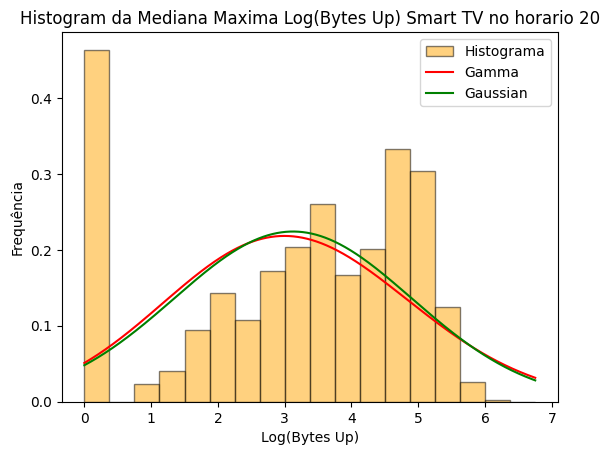

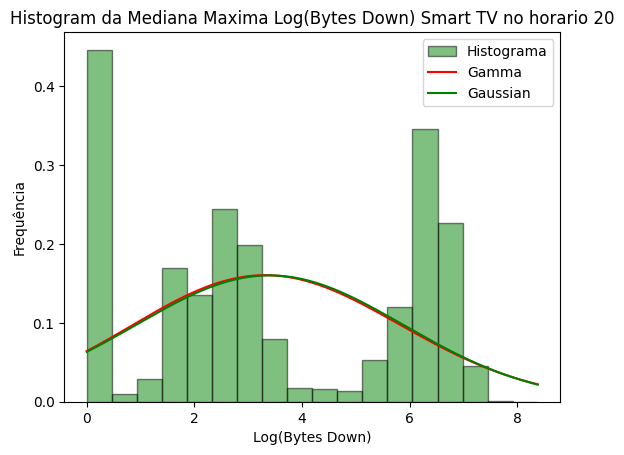

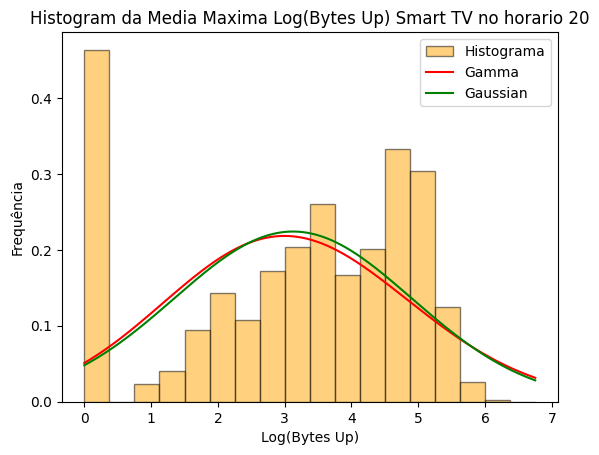

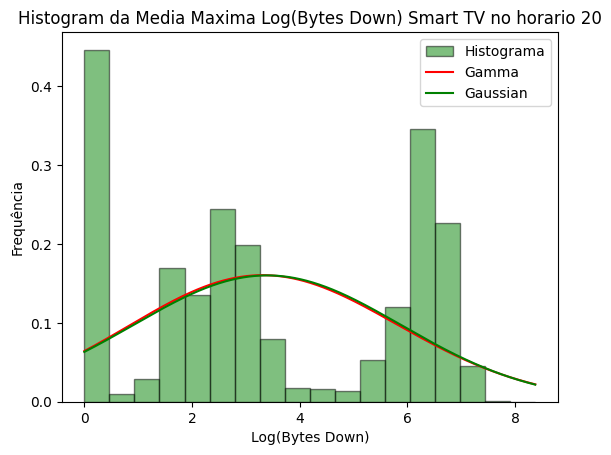

In [165]:
lista_dfs = [
    (df_mediana_up_maxima_smart, "log_bytes_up", "Mediana Maxima Log(Bytes Up) Smart TV", "log_bytes_up_max_median"),
    (df_mediana_down_maxima_smart, "log_bytes_down", "Mediana Maxima Log(Bytes Down) Smart TV", "log_bytes_down_max_median"),
    (df_media_up_maxima_smart, "log_bytes_up", "Media Maxima Log(Bytes Up) Smart TV", "log_bytes_up_max_mean"),
    (df_media_down_maxima_smart, "log_bytes_down", "Media Maxima Log(Bytes Down) Smart TV", "log_bytes_down_max_mean"),
]


for df, coluna, nome, nome_da_coluna in lista_dfs:
    fig = plt.figure()
    smart_hist_bin = sturges(df[coluna])
    plt.hist(
        df[coluna],
        bins= smart_hist_bin,
        color=("orange" if coluna == "log_bytes_up" else "green"),
        alpha=0.5,
        edgecolor="black",
        label="Histograma",
        density=True,
    )

    x = np.linspace(df[coluna].min(), df[coluna].max(), len(df[coluna]))

    shape, loc, scale = gamma.fit(df[coluna])
    gamma_distribution = gamma.pdf(x, shape, loc, scale)

    mean, std = norm.fit(df[coluna])
    gaussian_distribution = norm.pdf(x, mean, std)

    plt.plot(x, gamma_distribution, label="Gamma", color="red")
    plt.plot(x, gaussian_distribution, label="Gaussian", color="green")
    plt.xlabel("Log(Bytes Up)" if coluna == "log_bytes_up" else "Log(Bytes Down)")
    plt.ylabel("Frequência")
    plt.title(f"Histogram da {nome} no horario {df['hour'].iloc[0]}")
    plt.legend(loc="best")
    fig.savefig(
        f"Gráficos\secao4\MLE\Histograma\SmartTV\smart-tv_hist_mle_{nome_da_coluna}.png",
        dpi=fig.dpi,
    )

## Gráfico Probability Plot

### Chromecast

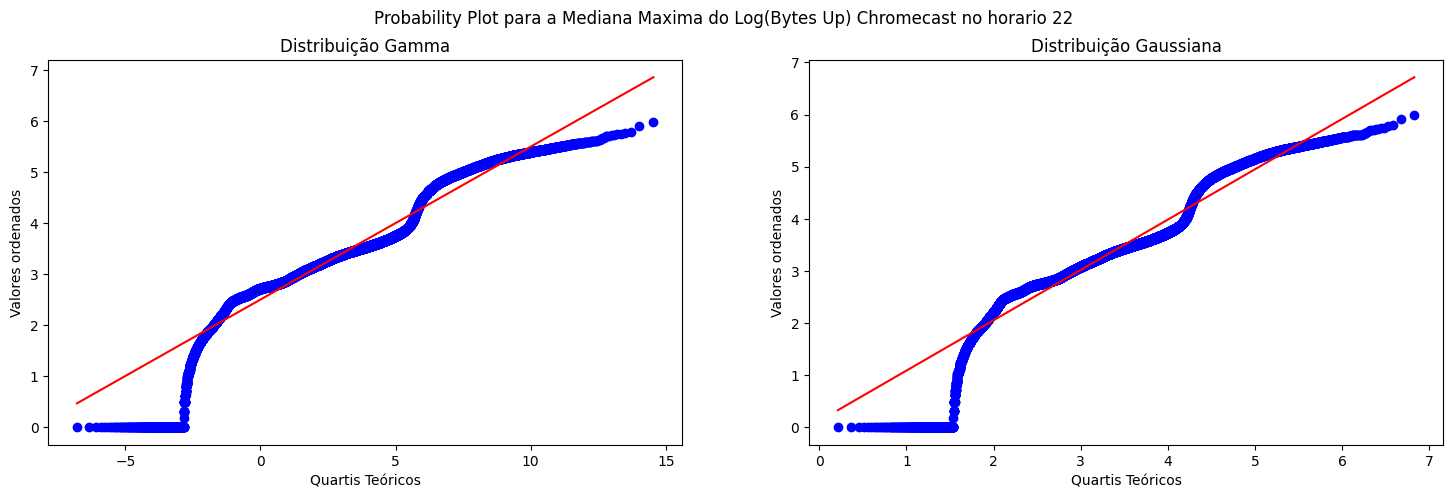

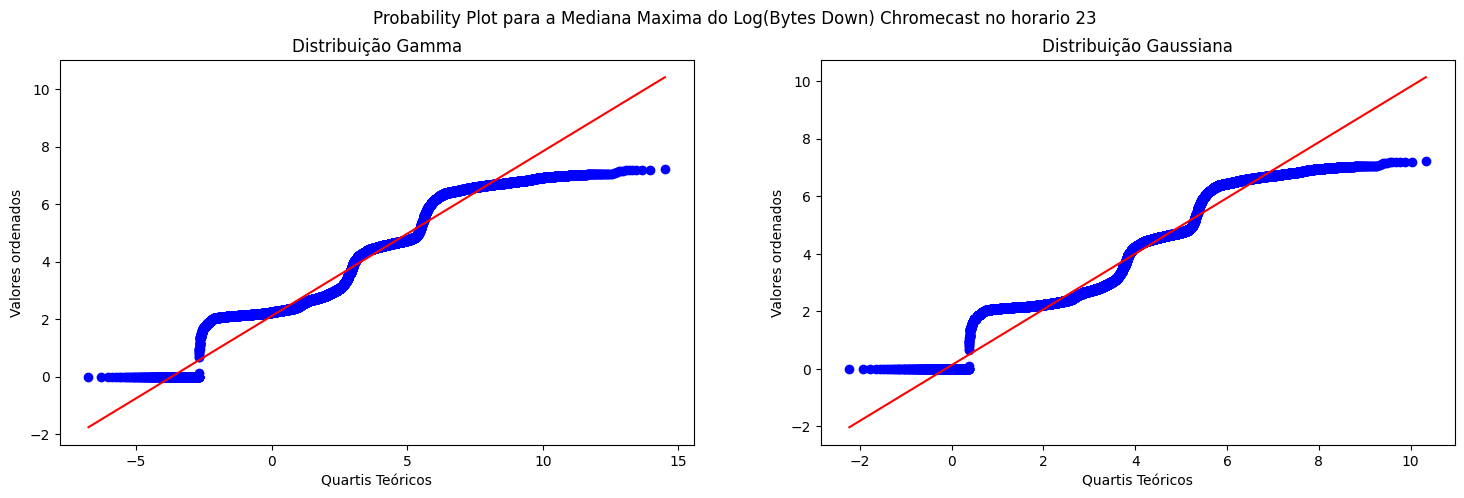

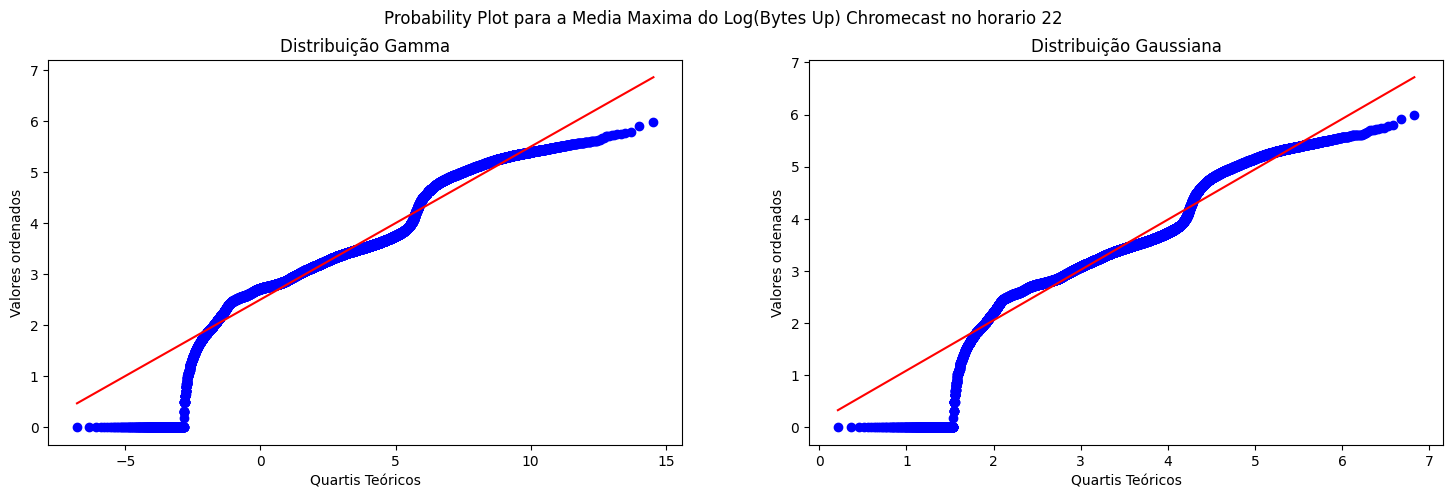

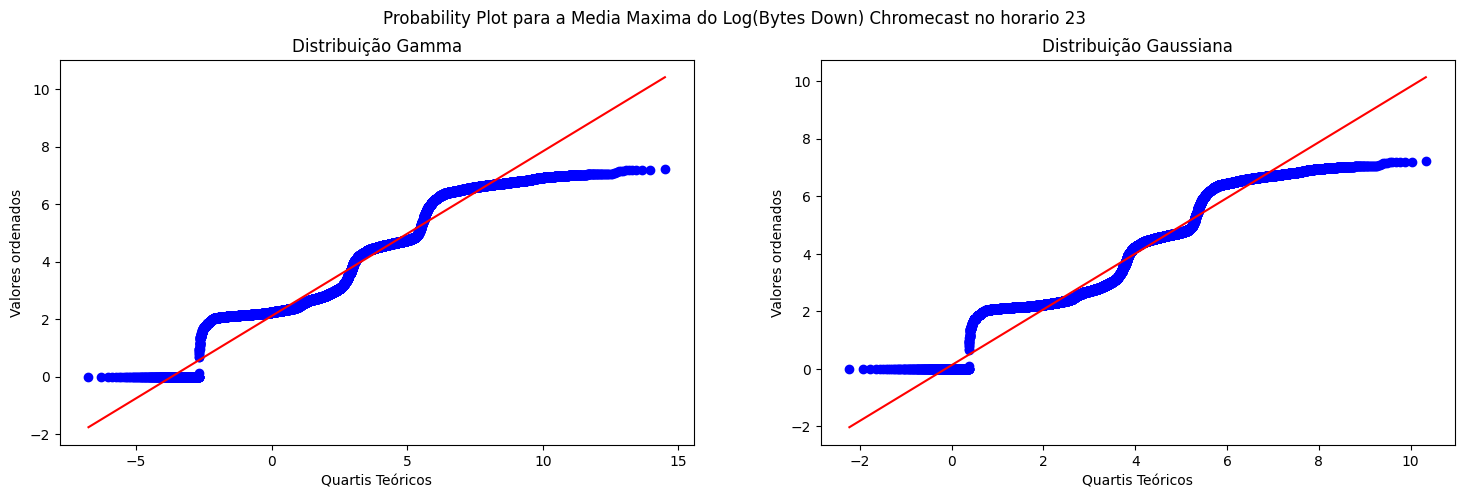

In [166]:
lista_dfs = [
    (df_mediana_up_maxima_chromecast, "log_bytes_up", "Mediana Maxima do Log(Bytes Up) Chromecast", "chromecast_max_median_up"),
    (df_mediana_down_maxima_chromecast, "log_bytes_down", "Mediana Maxima do Log(Bytes Down) Chromecast", "chromecast_max_median_down"),
    (df_media_up_maxima_chromecast, "log_bytes_up", "Media Maxima do Log(Bytes Up) Chromecast", "chromecast_max_mean_up"),
    (df_media_down_maxima_chromecast, "log_bytes_down", "Media Maxima do Log(Bytes Down) Chromecast", "chromecast_max_mean_down"),
]

for df, coluna, nome, nome_da_figura in lista_dfs:

    fig, axes = plt.subplots(1, 2, figsize=(18, 5))

    fig.suptitle(f"Probability Plot para a {nome} no horario {df['hour'].iloc[0]}")

    x = df[coluna]
    probplot(x, dist=gamma, sparams=(shape, loc, scale), plot=axes[0])
    probplot(x, dist=norm, sparams=(df[coluna].mean(), df[coluna].std()), plot=axes[1])
    
    axes[0].set_title(f"Distribuição Gamma")
    axes[1].set_title(f"Distribuição Gaussiana")

    axes[0].set(xlabel="Quartis Teóricos", ylabel="Valores ordenados")
    axes[1].set(xlabel="Quartis Teóricos", ylabel="Valores ordenados")

    fig.savefig(
        f"Gráficos\secao4\ProbabilityPlot\Chromecast\probability_plot_{nome_da_figura}.png",
        dpi=fig.dpi,
    )
    plt.show()

### SmartTV

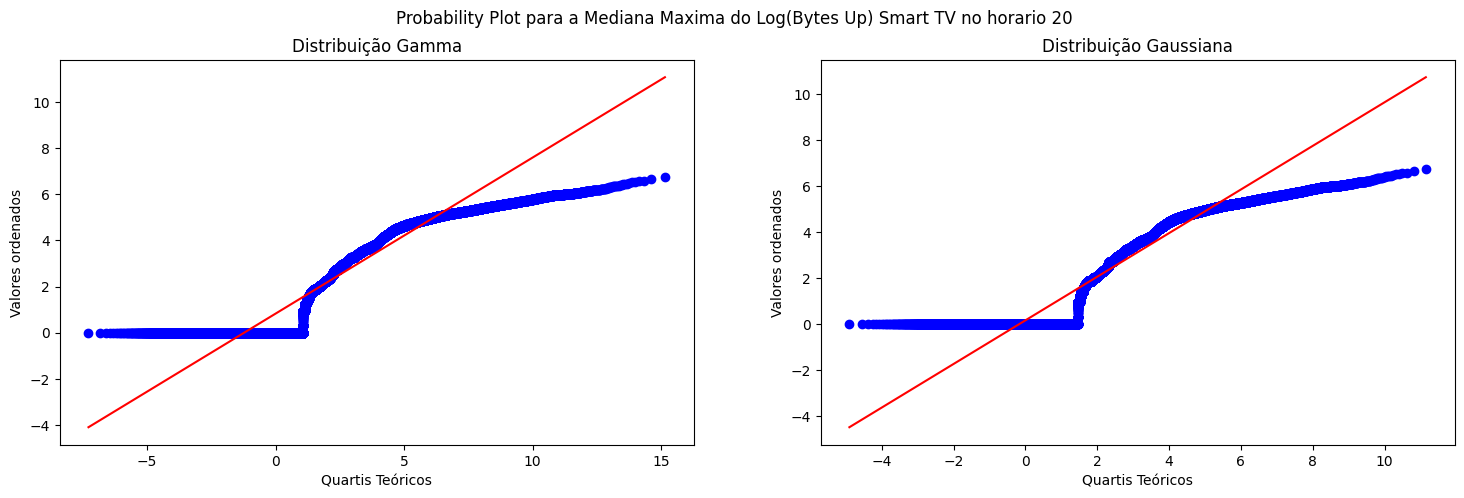

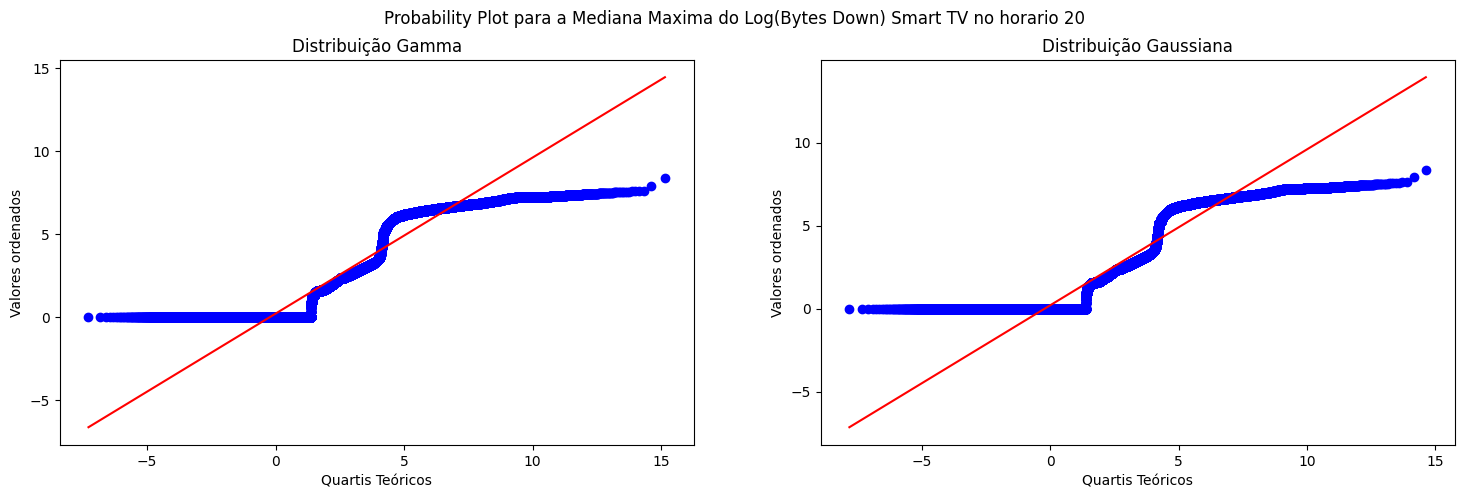

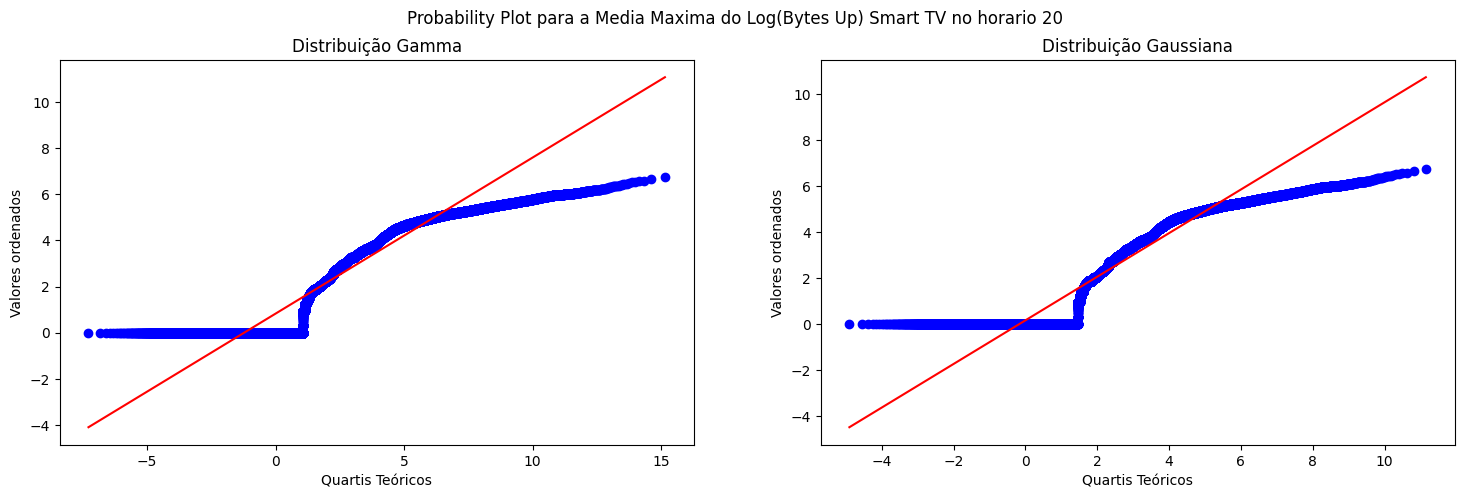

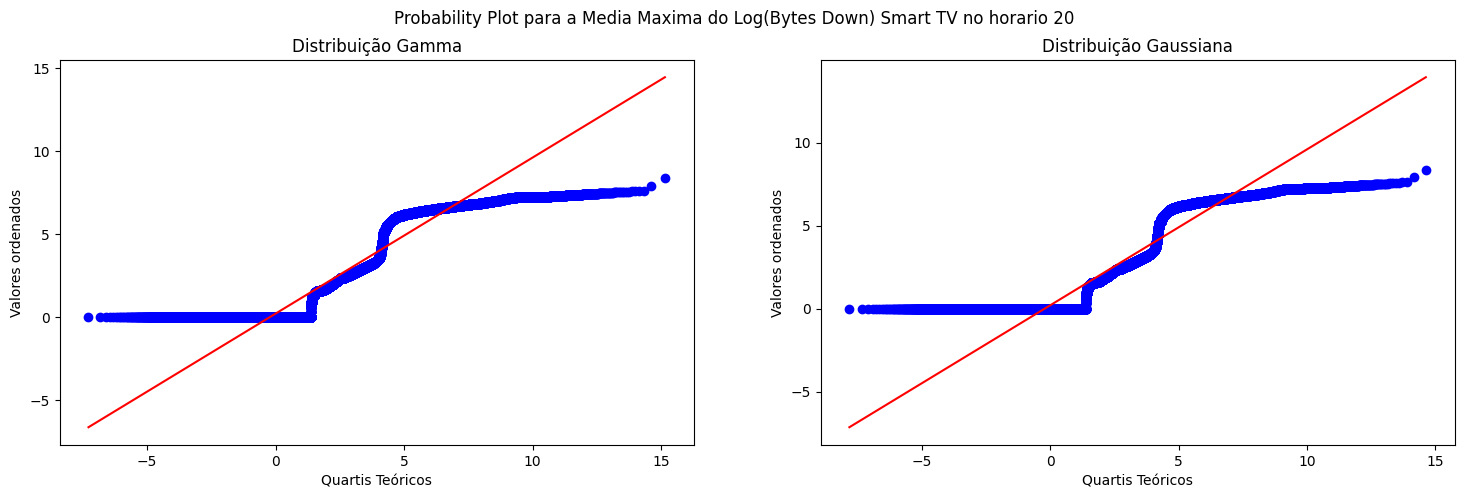

In [167]:
lista_dfs = [
    (df_mediana_up_maxima_smart, "log_bytes_up", "Mediana Maxima do Log(Bytes Up) Smart TV", "smart-tv_max_median_up"),
    (df_mediana_down_maxima_smart, "log_bytes_down", "Mediana Maxima do Log(Bytes Down) Smart TV", "smart-tv_max_median_down"),
    (df_media_up_maxima_smart, "log_bytes_up", "Media Maxima do Log(Bytes Up) Smart TV", "smart-tv_max_mean_up"),
    (df_media_down_maxima_smart, "log_bytes_down", "Media Maxima do Log(Bytes Down) Smart TV", "smart-tv_max_mean_down"),
]

for df, coluna, nome, nome_da_figura in lista_dfs:

    fig, axes = plt.subplots(1, 2, figsize=(18, 5))

    fig.suptitle(f"Probability Plot para a {nome} no horario {df['hour'].iloc[0]}")

    x = df[coluna]
    probplot(x, dist=gamma, sparams=(shape, loc, scale), plot=axes[0])
    probplot(x, dist=norm, sparams=(df[coluna].mean(), df[coluna].std()), plot=axes[1])
    
    axes[0].set_title(f"Distribuição Gamma")
    axes[1].set_title(f"Distribuição Gaussiana")

    axes[0].set(xlabel="Quartis Teóricos", ylabel="Valores ordenados")
    axes[1].set(xlabel="Quartis Teóricos", ylabel="Valores ordenados")

    fig.savefig(
        f"Gráficos\secao4\ProbabilityPlot\SmartTV\probability_plot_{nome_da_figura}.png",
        dpi=fig.dpi,
    )
    plt.show()

# Análise da correlação entre as taxas de upload e download para os horários com o maior valor de tráfego

## Coeficiente de Correlação de Amostragem

In [168]:
lista_dfs =[
    (
        df_mediana_up_maxima_smart, 
        df_mediana_down_maxima_smart, 
        "Mediana Maxima do Log(Bytes) Smart TV"),
    (
        df_media_up_maxima_smart, 
        df_media_down_maxima_smart, 
        "Media Maxima Log(Bytes) Smart TV"),
    (
        df_mediana_up_maxima_mesmo_horario_down_chromecast, 
        df_mediana_down_maxima_chromecast,
        "Mediana Maxima Log(Bytes) Chromecast"
    ),
    (
        df_media_up_maxima_mesmo_horario_down_chromecast, 
        df_media_down_maxima_chromecast, 
        "Media Maxima Log(Bytes) Chromecast"),
]

for df1, df2, nome in lista_dfs:
    if df1.shape[0] != df2.shape[0]:
        if df1.shape[0] > df2.shape[0]:
            df1 = df1.sample(n=df2.shape[0])
        else:
            df2 = df2.sample(n=df1.shape[0])

    pearson_coef, p_value = pearsonr(df1["log_bytes_up"], df2["log_bytes_down"])
    df_coef = pd.DataFrame(
        {
            "Coeficiente de Pearson": [pearson_coef], 
            "p_valor": [p_value]
        }
    )

    print(f"Coeficiente de Correlação de Pearson para a {nome}\n")
    print(df_coef.to_markdown())
    print()

Coeficiente de Correlação de Pearson para a Mediana Maxima do Log(Bytes) Smart TV

|    |   Coeficiente de Pearson |   p_valor |
|---:|-------------------------:|----------:|
|  0 |                 0.915609 |         0 |

Coeficiente de Correlação de Pearson para a Media Maxima Log(Bytes) Smart TV

|    |   Coeficiente de Pearson |   p_valor |
|---:|-------------------------:|----------:|
|  0 |                 0.915609 |         0 |

Coeficiente de Correlação de Pearson para a Mediana Maxima Log(Bytes) Chromecast

|    |   Coeficiente de Pearson |   p_valor |
|---:|-------------------------:|----------:|
|  0 |                 0.792504 |         0 |

Coeficiente de Correlação de Pearson para a Media Maxima Log(Bytes) Chromecast

|    |   Coeficiente de Pearson |   p_valor |
|---:|-------------------------:|----------:|
|  0 |                 0.792504 |         0 |



## Gráfico dos Coeficientes de Correlação de Amostragem

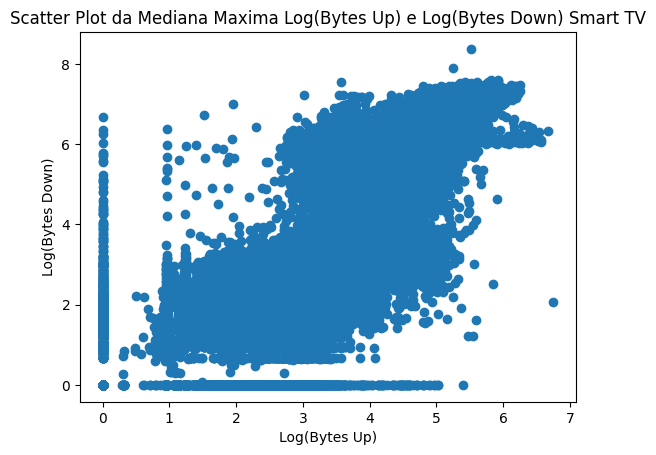

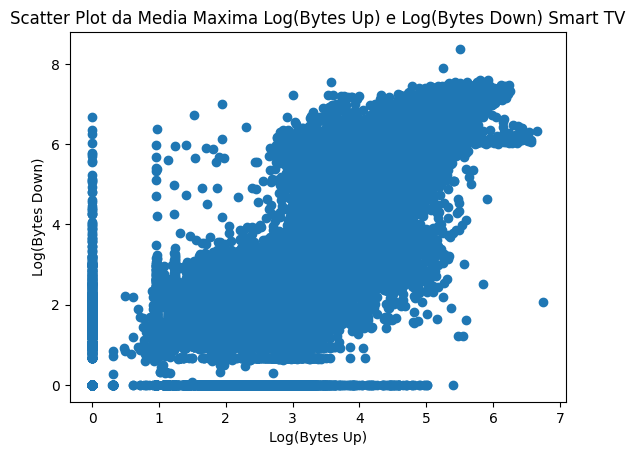

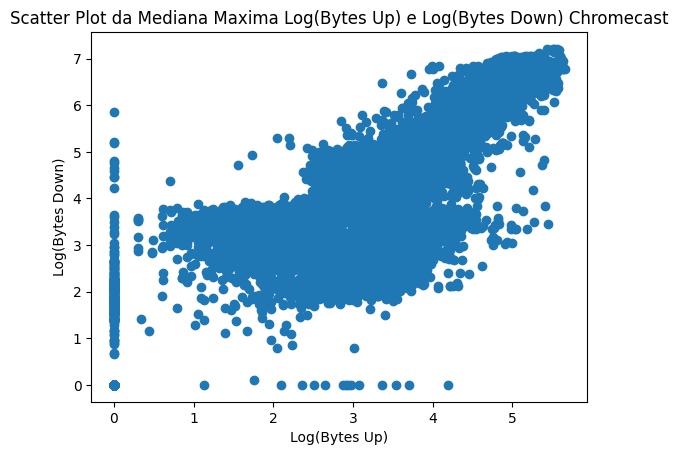

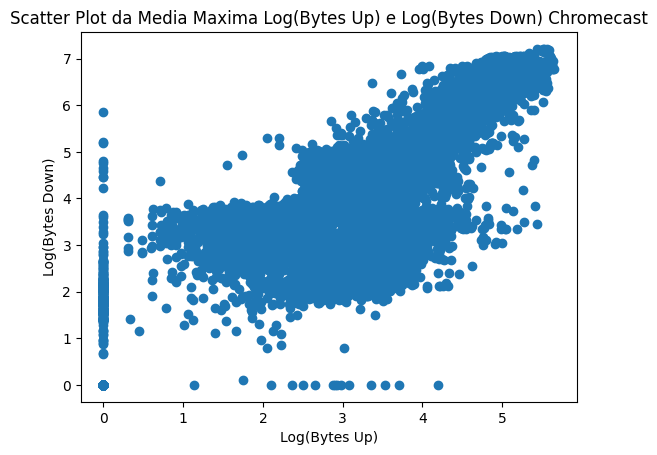

In [169]:
lista_dfs = [
    (
        df_mediana_up_maxima_smart,
        df_mediana_down_maxima_smart,
        "Mediana Maxima Log(Bytes Up) e Log(Bytes Down) Smart TV",
        "smart_tv_max_mediana",
    ),
    (
        df_media_up_maxima_smart,
        df_media_down_maxima_smart,
        "Media Maxima Log(Bytes Up) e Log(Bytes Down) Smart TV",
        "smart_tv_max_media",
    ),
    (
        df_mediana_up_maxima_mesmo_horario_down_chromecast,
        df_mediana_down_maxima_chromecast,
        "Mediana Maxima Log(Bytes Up) e Log(Bytes Down) Chromecast",
        "chromecast_max_mediana",
    ),
    (
        df_media_up_maxima_mesmo_horario_down_chromecast,
        df_media_down_maxima_chromecast,
        "Media Maxima Log(Bytes Up) e Log(Bytes Down) Chromecast",
        "chromecast_max_media",
    ),
]


for df1, df2, nome, nome_da_figura in lista_dfs:
    if df1.shape[0] != df2.shape[0]:
        if df1.shape[0] > df2.shape[0]:
            df1 = df1.sample(n=df2.shape[0])
        else:
            df2 = df2.sample(n=df1.shape[0])

    fig = plt.figure()
    plt.scatter(df1["log_bytes_up"], df2["log_bytes_down"])
    plt.xlabel("Log(Bytes Up)")
    plt.ylabel("Log(Bytes Down)")
    plt.title(f"Scatter Plot da {nome}")

    pasta_local = (
        f"Gráficos\secao5\ScatterPlot\SmartTV"
        if "smart_tv" in nome_da_figura
        else f"Gráficos\secao5\ScatterPlot\Chromecast"
    )

    fig.savefig(
        f"{pasta_local}\scatter_plot_{nome_da_figura}.png",
        dpi=fig.dpi,
    )

    plt.show()

# Comparação dos dados gerados pelos dispositivos SmartTV e Chromecast

## G-teste

In [170]:
df_g_test = pd.DataFrame(columns=["G_test", "p_valor", "Nome", "Coluna"])
lista_dfs = [
    (
        df_mediana_up_maxima_smart,
        df_mediana_up_maxima_chromecast,
        "smart_tv_mediana_up_maxima_chromecast_mediana_up_maxima",
        "log_bytes_up",
    ),
    (
        df_media_up_maxima_smart,
        df_media_up_maxima_chromecast,
        "smart_tv_media_up_maxima_chromecast_media_up_maxima",
        "log_bytes_up",
    ),
    (
        df_mediana_down_maxima_smart,
        df_mediana_down_maxima_chromecast,
        "smart_tv_mediana_down_maxima_chromecast_mediana_down_maxima",
        "log_bytes_down",
    ),
    (
        df_media_down_maxima_smart,
        df_media_down_maxima_chromecast,
        "smart_tv_media_down_maxima_chromecast_media_down_maxima",
        "log_bytes_down",
    ),
]

for df1, df2, nome, coluna in lista_dfs:
    df1, df2 = segmentar_bins(df1, df2, coluna)

    observed_upload_df1 = df1[f"{coluna}_bins"].value_counts().sort_index()
    observed_upload_df2 = df2[f"{coluna}_bins"].value_counts().sort_index()

    observed_upload_df1 = observed_upload_df1 / observed_upload_df1.sum()
    observed_upload_df2 = observed_upload_df2 / observed_upload_df2.sum()
    
    G, p = power_divergence(observed_upload_df1, observed_upload_df2, lambda_='log-likelihood')

    df_g_test = df_g_test.append(
        {
            "G_test": G,
            "p_valor": p,
            "Nome": nome,
            "Coluna": coluna,
        },
        ignore_index=True,
    )

print(df_g_test.to_markdown())

|    |   G_test |   p_valor | Nome                                                        | Coluna         |
|---:|---------:|----------:|:------------------------------------------------------------|:---------------|
|  0 |  1.74065 |  0.999996 | smart_tv_mediana_up_maxima_chromecast_mediana_up_maxima     | log_bytes_up   |
|  1 |  1.74065 |  0.999996 | smart_tv_media_up_maxima_chromecast_media_up_maxima         | log_bytes_up   |
|  2 |  2.35922 |  0.999967 | smart_tv_mediana_down_maxima_chromecast_mediana_down_maxima | log_bytes_down |
|  3 |  2.35922 |  0.999967 | smart_tv_media_down_maxima_chromecast_media_down_maxima     | log_bytes_down |
